## References
 - __[Script: Kaggle](https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population/notebook)__
 - __[Dataset: Kaggle](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)__

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('../Python/Input/Happiness'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify
import pywaffle
from IPython.display import display

../Python/Input/Happiness\population_by_country_2020.csv
../Python/Input/Happiness\world-happiness-report-2021.csv
../Python/Input/Happiness\world-happiness-report.csv


In [4]:
# datasets
df = pd.read_csv('../Python/Input/Happiness/world-happiness-report-2021.csv')
df2 = pd.read_csv('../Python/Input/Happiness/world-happiness-report.csv')
pop = pd.read_csv('../Python/Input/Happiness/population_by_country_2020.csv')

safety = df.copy()

# renaming columns for easier merge later
df.rename(columns={'Country name': 'Country'}, inplace=True)
df2.rename(columns={'Country name': 'Country'}, inplace=True)
pop.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)

# show datasets
print('World Happiness Report 2021')
display(df.head())
print()
print('World Happiness Report')
display(df2.head())
print()
print('Population by Country 2020')
display(pop.head())
print()

# #might use later 
temporal = df2.groupby(['year','Country'])['Life Ladder'].mean().unstack().T
temporal = temporal.fillna(0).astype(int)

print('Life Ladder for Country by Year')
temporal

World Happiness Report 2021


Country Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798


World Happiness Report


Country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268


Population by Country 2020


Country  Population (2020) Yearly Change  Net Change  \
0          China         1440297825        0.39 %     5540090   
1          India         1382345085        0.99 %    13586631   
2  United States          331341050        0.59 %     1937734   
3      Indonesia          274021604        1.07 %     2898047   
4       Pakistan          221612785        2.00 %     4327022   

   Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0              153          9388211       -348399.0        1.7       38   
1              464          2973190       -532687.0        2.2       28   
2               36          9147420        954806.0        1.8       38   
3              151          1811570        -98955.0        2.3       30   
4              287           770880       -233379.0        3.6       23   

  Urban Pop % World Share  
0        61 %     18.47 %  
1        35 %     17.70 %  
2        83 %      4.25 %  
3        56 %      3.51 %  
4        35 %      2.83 %


Life Ladder for Country by Year


year         2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Country                                                                         
Afghanistan     0     0     0     3     4     4     3     3     3     3     3   
Albania         0     0     4     0     5     5     5     5     4     4     4   
Algeria         0     0     0     0     0     5     5     5     0     6     0   
Angola          0     0     0     0     0     0     5     4     3     3     0   
Argentina       0     6     6     5     6     6     6     6     6     6     6   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela       7     6     0     6     7     7     6     7     6     6     5   
Vietnam         0     5     5     5     5     5     5     5     5     5     5   
Yemen           0     0     4     0     4     4     3     4     4     3     2   
Zambia          0     4     3     4     5     0     4     5     5     4     4   
Zimbabwe        0     3     3     3     4     4     4     4     4     4     3   

year         2016  2017  2018  2019  2020  
Country                                    
Afghanistan     4     2     2     2     0  
Albania         4     4     5     4     5  
Algeria         5     5     5     4     0  
Angola          0     0     0     0     0  
Argentina       6     6     5     6     5  
...           ...   ...   ...   ...   ...  
Venezuela       4     5     5     5     4  
Vietnam         5     5     5     5     0  
Yemen           3     3     3     4     0  
Zambia          4     3     4     3     4  
Zimbabwe        3     3     3     2     3  

[166 rows x 16 columns]

# Initial Overview

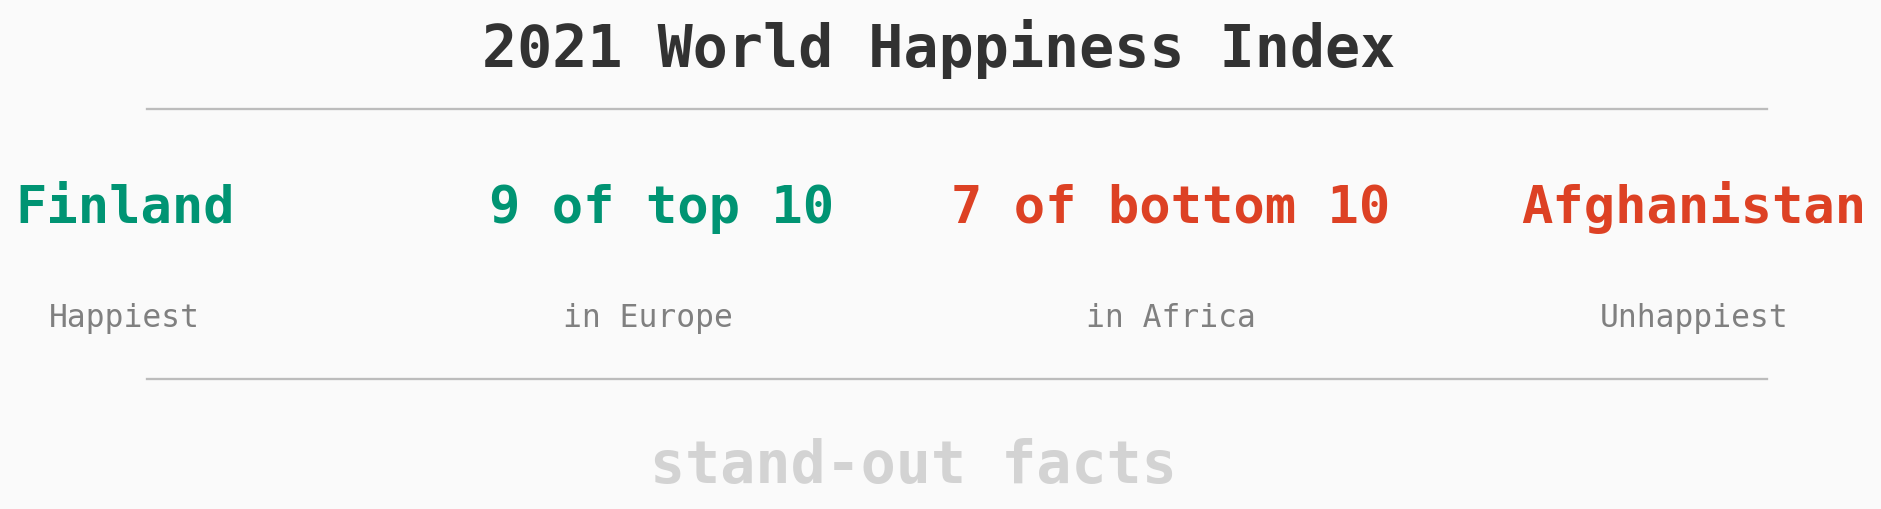

In [6]:
# colours
low_c = '#dd4124'
high_c = '#009473'
plt.rcParams["font.family"] = "monospace"

# inspiration ; https://www.kaggle.com/gaetanlopez/how-to-make-clean-visualizations
# changed code signif.

fig = plt.figure(figsize=(6,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(1.167,0.85,"2021 World Happiness Index",color='#323232',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.13,-0.35,"stand-out facts",color='lightgray',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"Finland",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.1,"Happiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.77,0.4,"9 of top 10",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.1,"in Europe",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"7 of bottom 10",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.1,"in Africa",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"Afghanistan",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.1,"Unhappiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
import matplotlib.lines as lines
l1 = lines.Line2D([0.15, 1.95], [0.67, 0.67], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])
l2 = lines.Line2D([0.15, 1.95], [0.07, 0.07], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l2])
    
plt.show()

# Happiest Countries in the World?

In [8]:
# datasets
past_winners = df2.loc[df2.groupby("year")["Life Ladder"].idxmax()]
past_bottom = df2.loc[df2.groupby("year")["Life Ladder"].idxmin()]

hap = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]
unhap = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]
# top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)
top_bottom = pd.concat([hap, unhap], ignore_index=False).sort_values(ascending=True)

# show datasets
print('Past Winners')
display(past_winners)
print()
print('Past Bottoms')
display(past_bottom)
print()
print('Top and Bottom 10')
# display(hap)
# display(unhap)
display(top_bottom)
print()

Past Winners


Country  year  Life Ladder  Log GDP per capita  Social support  \
449       Denmark  2005        8.019              10.851           0.972   
551       Finland  2006        7.672              10.745           0.965   
450       Denmark  2007        7.834              10.891           0.954   
451       Denmark  2008        7.971              10.880           0.954   
452       Denmark  2009        7.683              10.824           0.939   
453       Denmark  2010        7.771              10.839           0.975   
454       Denmark  2011        7.788              10.848           0.962   
1654  Switzerland  2012        7.776              11.079           0.947   
300        Canada  2013        7.594              10.757           0.936   
457       Denmark  2014        7.508              10.862           0.956   
1304       Norway  2015        7.603              11.033           0.947   
559       Finland  2016        7.660              10.740           0.954   
560       Finland  2017        7.788              10.768           0.964   
561       Finland  2018        7.858              10.783           0.962   
562       Finland  2019        7.780              10.792           0.937   
563       Finland  2020        7.889              10.750           0.962   

      Healthy life expectancy at birth  Freedom to make life choices  \
449                              69.60                         0.971   
551                              69.76                         0.969   
450                              69.92                         0.932   
451                              70.08                         0.970   
452                              70.24                         0.949   
453                              70.40                         0.944   
454                              70.62                         0.935   
1654                             72.78                         0.945   
300                              72.68                         0.916   
457                              71.28                         0.942   
1304                             72.90                         0.948   
559                              71.70                         0.948   
560                              71.80                         0.962   
561                              71.90                         0.938   
562                              72.00                         0.948   
563                              72.10                         0.962   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
449          NaN                      0.237            0.860            0.154  
551       -0.005                      0.132            0.722            0.172  
450        0.240                      0.206            0.828            0.194  
451        0.272                      0.248            0.757            0.163  
452        0.264                      0.206            0.749            0.234  
453        0.242                      0.175            0.785            0.155  
454        0.298                      0.220            0.769            0.175  
1654       0.139                      0.323            0.859            0.176  
300        0.316                      0.406            0.851            0.263  
457        0.118                      0.237            0.832            0.233  
1304       0.257                      0.299            0.843            0.209  
559       -0.027                      0.250            0.797            0.182  
560       -0.002                      0.192            0.787            0.176  
561       -0.127                      0.199            0.782            0.182  
562       -0.052                      0.195            0.755            0.181  
563       -0.116                      0.164            0.744            0.193


Past Bottoms


Country  year  Life Ladder  Log GDP per capita  \
1753                    Turkey  2005        4.719               9.809   
1727                      Togo  2006        3.202               7.078   
1935                  Zimbabwe  2007        3.280               7.666   
1728                      Togo  2008        2.808               7.052   
1700                  Tanzania  2009        3.408               7.572   
1701                  Tanzania  2010        3.229               7.604   
1729                      Togo  2011        2.936               7.146   
1666                     Syria  2012        3.164               8.563   
1667                     Syria  2013        2.688               8.396   
1730                      Togo  2014        2.839               7.247   
990                    Liberia  2015        2.702               7.365   
311   Central African Republic  2016        2.693               6.785   
9                  Afghanistan  2017        2.662               7.697   
10                 Afghanistan  2018        2.694               7.692   
11                 Afghanistan  2019        2.375               7.697   
1948                  Zimbabwe  2020        3.160               7.829   

      Social support  Healthy life expectancy at birth  \
1753           0.820                             62.60   
1727           0.435                             49.26   
1935           0.828                             42.86   
1728           0.291                             50.18   
1700           0.837                             51.40   
1701           0.813                             52.30   
1729           0.303                             51.58   
1666           0.588                             60.54   
1667           0.585                             58.76   
1730           0.444                             53.02   
990            0.638                             53.70   
311            0.290                             44.90   
9              0.491                             52.80   
10             0.508                             52.60   
11             0.420                             52.40   
1948           0.717                             56.80   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
1753                         0.623         NaN                      0.877   
1727                         0.628      -0.007                      0.850   
1935                         0.456      -0.082                      0.946   
1728                         0.287      -0.055                      0.932   
1700                         0.607       0.308                      0.903   
1701                         0.597       0.139                      0.866   
1729                         0.584      -0.070                      0.832   
1666                         0.467       0.316                      0.673   
1667                         0.455       0.225                      0.663   
1730                         0.663      -0.085                      0.795   
990                          0.671      -0.061                      0.903   
311                          0.624       0.033                      0.859   
9                            0.427      -0.121                      0.954   
10                           0.374      -0.094                      0.928   
11                           0.394      -0.108                      0.924   
1948                         0.643      -0.009                      0.789   

      Positive affect  Negative affect  
1753            0.557              NaN  
1727            0.615            0.348  
1935            0.661            0.265  
1728            0.362            0.379  
1700            0.778            0.161  
1701            0.717            0.146  
1729            0.480            0.395  
1666            0.464            0.705  
1667            0.387            0.622  
1730            0.583            0.443  
990             0.505            


Top and Bottom 10


Country
Afghanistan    2.523
Zimbabwe       3.145
Rwanda         3.415
Botswana       3.467
Lesotho        3.512
Malawi         3.600
Haiti          3.615
Tanzania       3.623
Yemen          3.658
Burundi        3.775
Austria        7.268
New Zealand    7.277
Luxembourg     7.324
Sweden         7.363
Norway         7.392
Netherlands    7.464
Iceland        7.554
Switzerland    7.571
Denmark        7.620
Finland        7.842
Name: Ladder score, dtype: float64

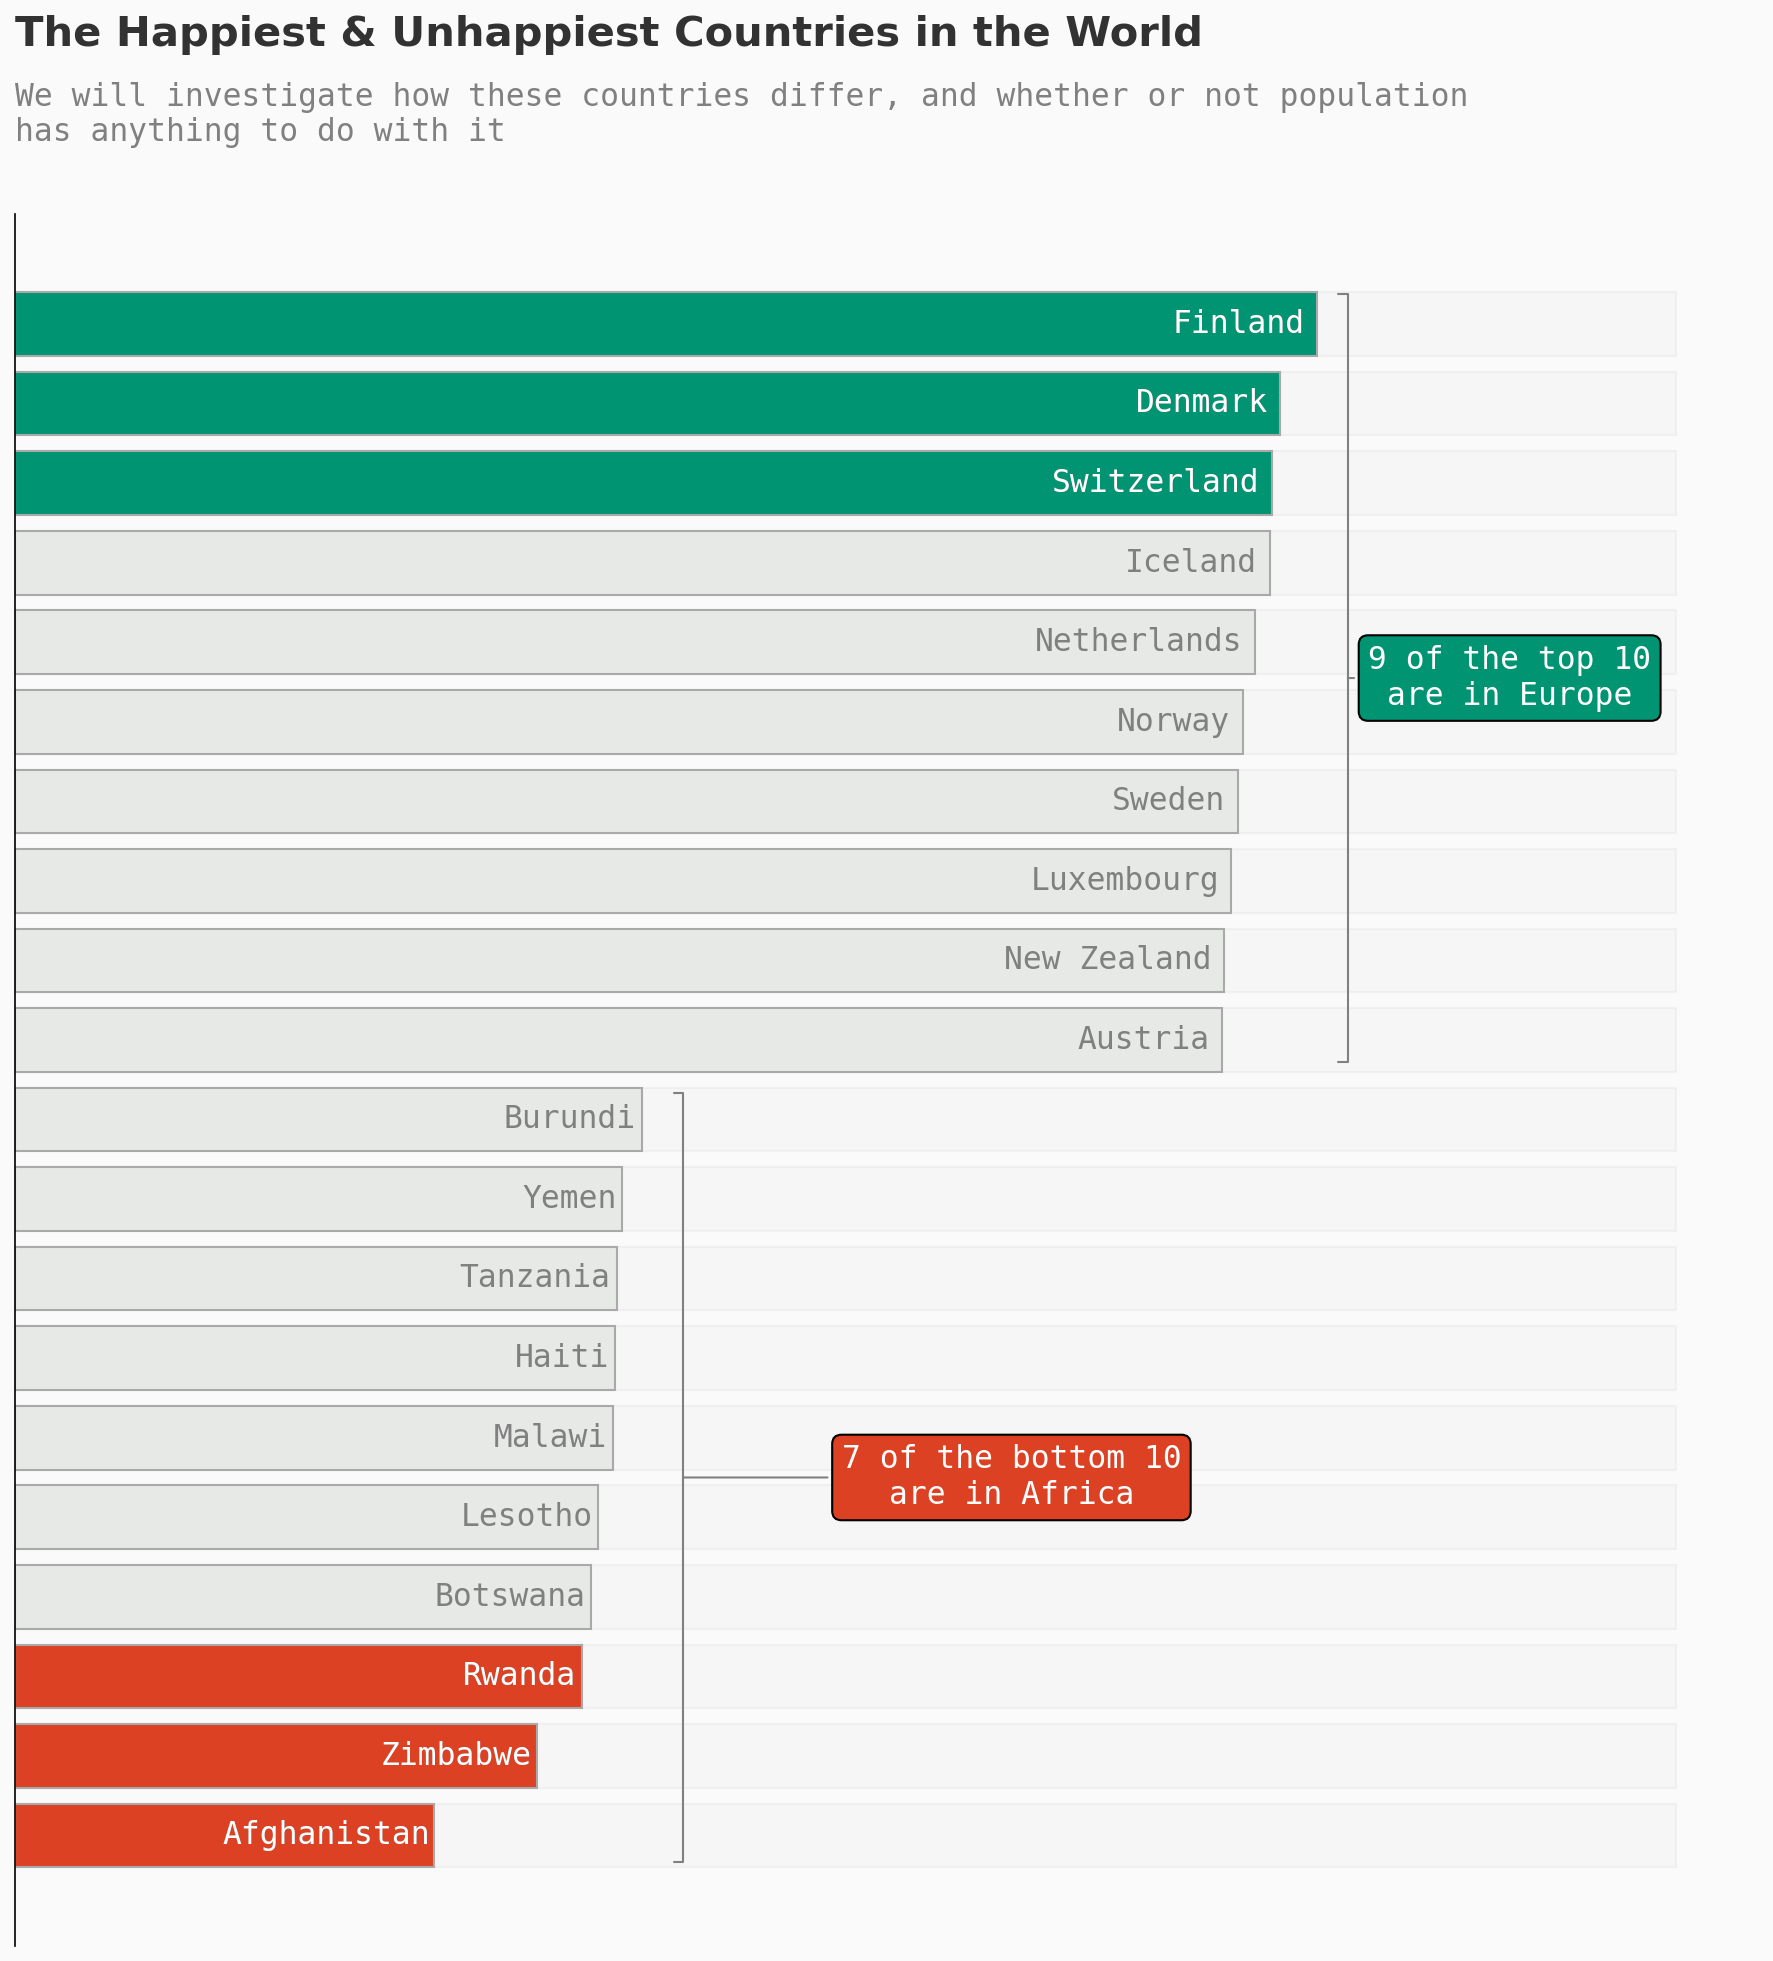

In [9]:
fig = plt.figure(figsize=(15,15),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

# Plots 
# Happiest
data = top_bottom

# color highlight
color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c 
color_map[17] = color_map[18] = color_map[19] =  high_c 

#base
ax0.barh(data.index, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)

# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)

for i in range(0,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)
# diff color text
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)

for i in range(17,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(data[i]-(data[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,22.5,'The Happiest & Unhappiest Countries in the World',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,21.3,'We will investigate how these countries differ, and whether or not population\nhas anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

ax0.annotate('7 of the bottom 10\nare in Africa', xy=(4, 4.5), xytext=(6, 4.5), xycoords='data', 
            fontsize=15, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc=low_c),
            arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')

ax0.annotate('9 of the top 10\nare in Europe', xy=(8, 14.55), xytext=(9, 14.55), xycoords='data', 
            fontsize=15, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc=high_c),
            arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')
plt.show()

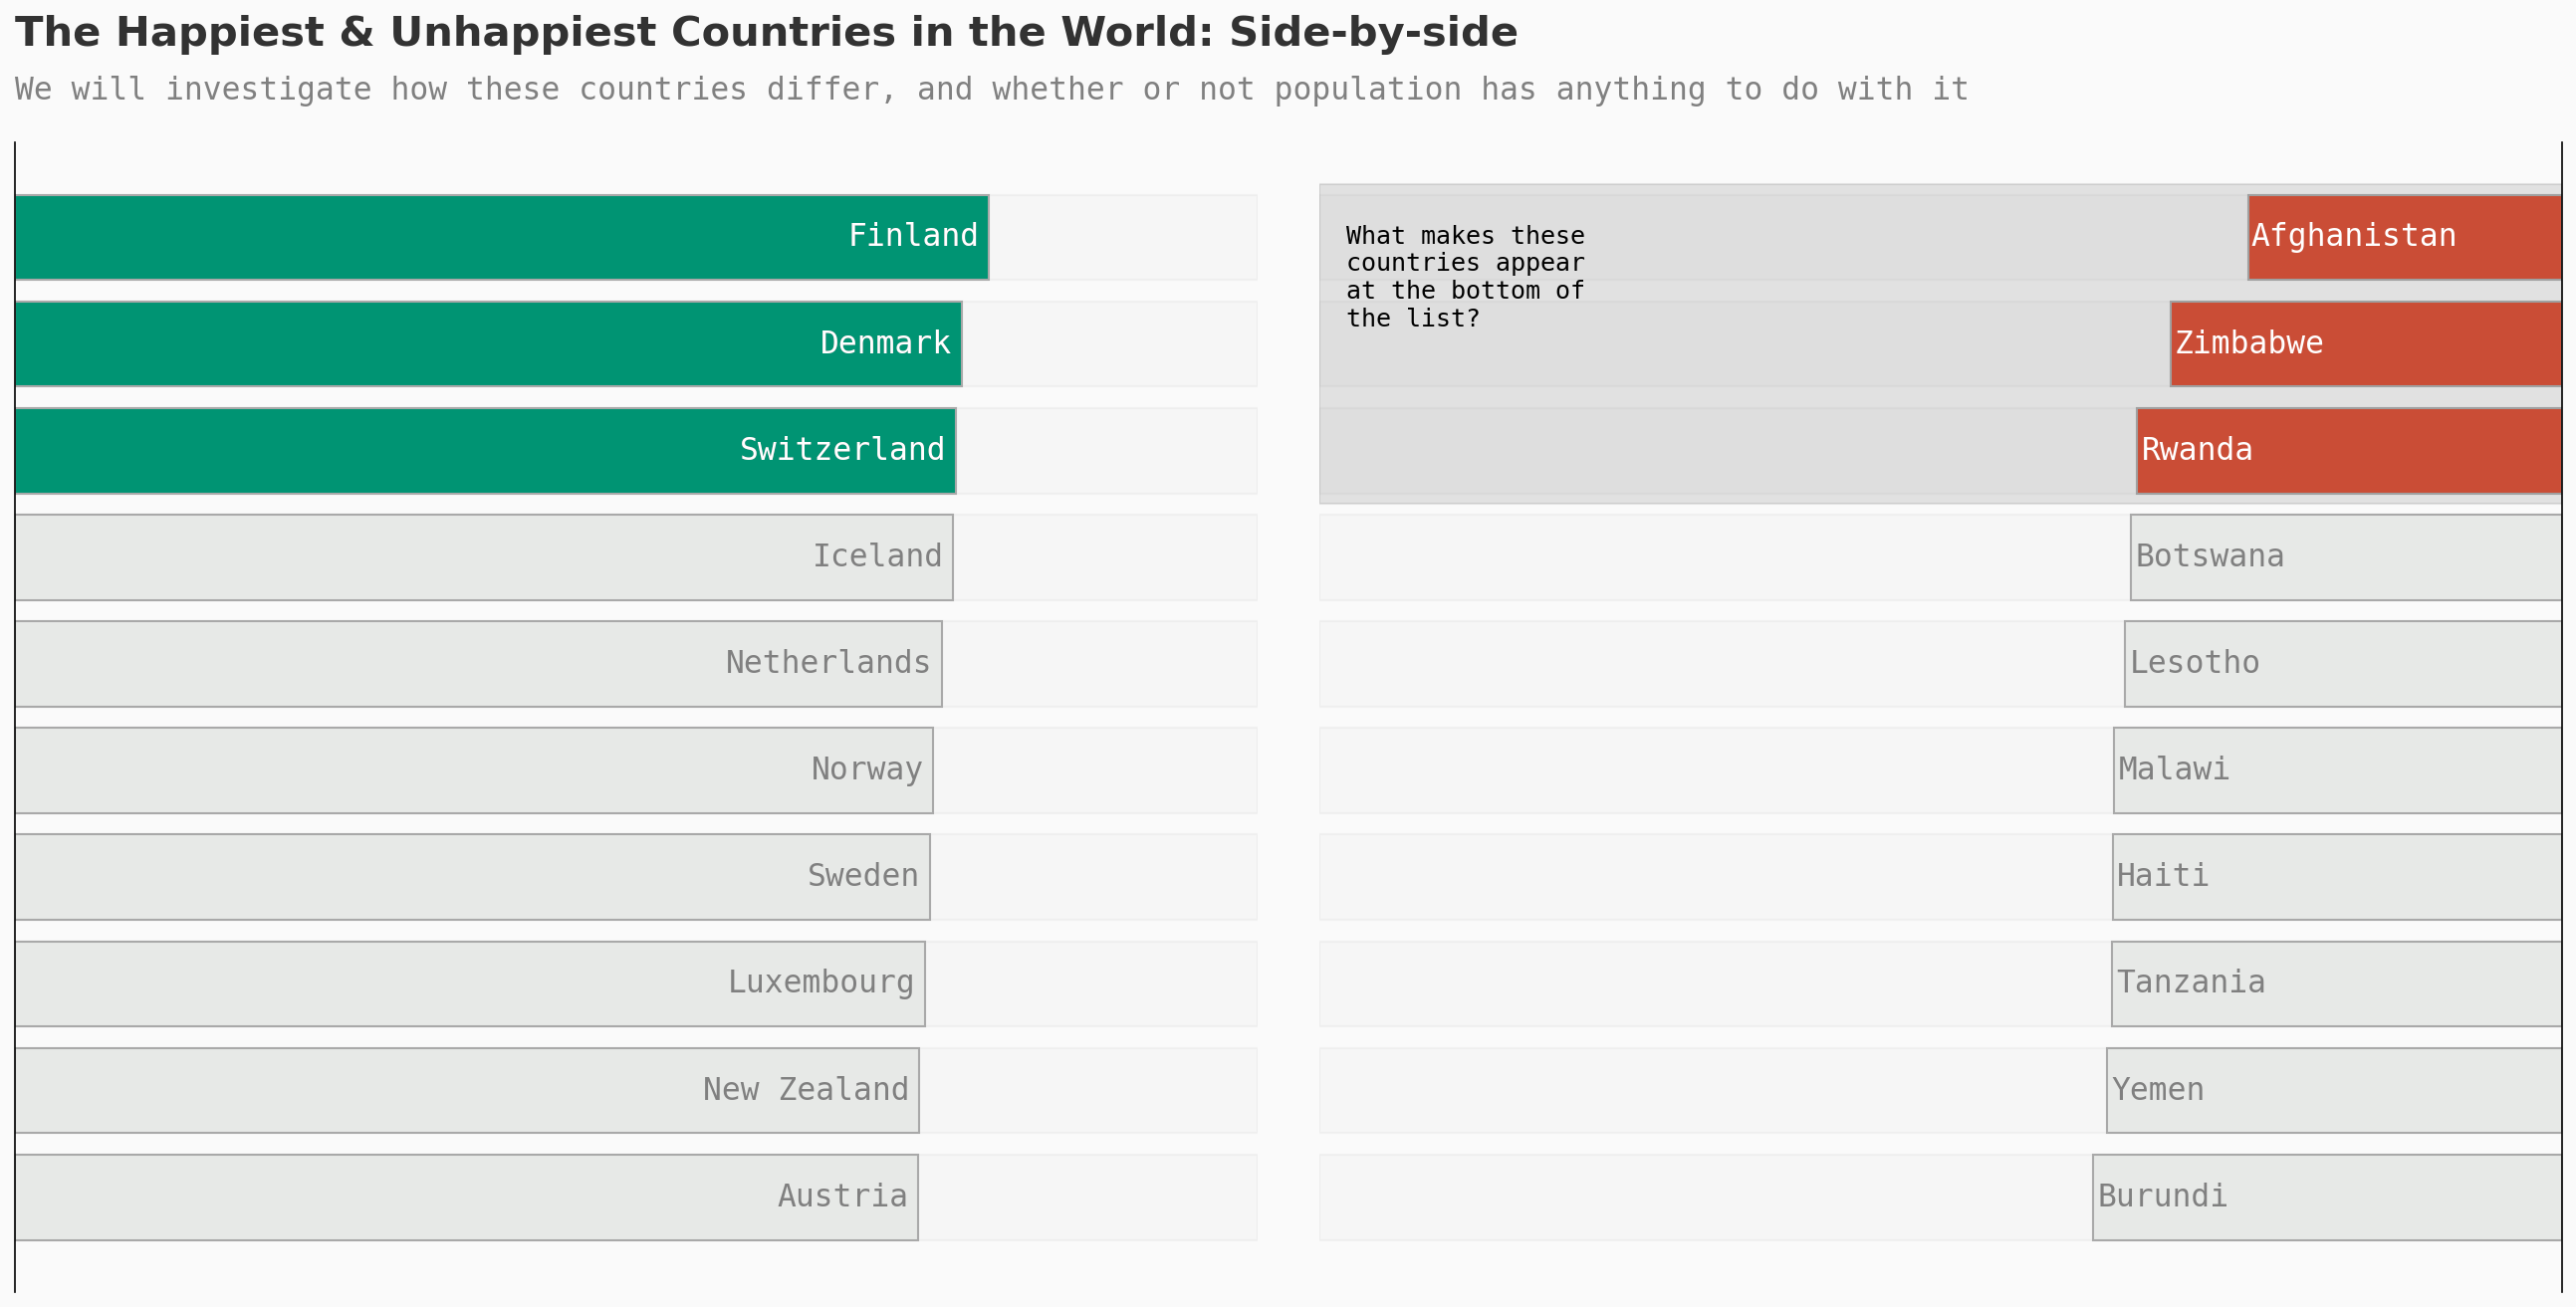

In [10]:
fig = plt.figure(figsize=(22,10),dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Plots 
# Happiest
data = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  high_c # color highlight

#base
ax0.barh(data.index[::-1], 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)
# actual
ax0.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)

#annotations
#for i in data.index:
 #   ax.annotate(f"{round(data[i],3)}", 
  #                 xy=(data[i] + 0.5,i), #i like to change this to roughly 5% of the highest cat
   #                va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=12)

for i in range(0,10):
    ax0.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)
# diff color text
for i in range(7,10):
    ax0.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    
# Unhappiest
data = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]

color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight

#base
ax1.barh(data.index[::-1], 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)

# actual
ax1.barh(data.index, data, 
       edgecolor='darkgray',color=color_map)

#annotations
#for i in data.index:
 #   ax.annotate(f"{round(data[i],3)}", 
  #                 xy=(data[i] + 0.5,i), #i like to change this to roughly 5% of the highest cat
   #                va = 'center', ha='right',fontweight='light', fontfamily='serif',fontsize=12)

for i in range(7,10):
    ax1.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
# diff color text
for i in range(0,7):
    ax1.annotate(list(data.index)[::-1][i], 
                   xy=(data[::-1][i]-(data[::-1][i]*0.01), i), 
                   va = 'center', ha='left',fontweight='light', fontfamily='monospace',fontsize=15, color='gray',rotation=0)

# Remove border from plot
for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
    
ax0.set_xlim(0,10)
ax1.set_xlim(10,0)
    
# ax labels off
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

ax0.text(0,10.8,'The Happiest & Unhappiest Countries in the World: Side-by-side',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,10.3,'We will investigate how these countries differ, and whether or not population has anything to do with it',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

# rect
from matplotlib.patches import Rectangle
X, Y = 0, 6.5

ax1.add_patch(Rectangle((X, Y), 10, 3,alpha=0.2, edgecolor='gray',facecolor='gray'))

fig.text(0.53,0.72,
        
'''
What makes these 
countries appear 
at the bottom of
the list?

''',color='black',fontfamily='monospace',fontsize=12)

plt.show()

# Happiness of Top 20 Countries Over the Years 

In [12]:
# Reduced list as too many to show all at once 
top_list_ = df2.groupby('Country')['Life Ladder'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Life Ladder',ascending=True)
display(top_list_)

Country  Life Ladder
19         Germany     6.843133
18            Oman     6.853000
17  United Kingdom     6.917600
16         Belgium     6.981500
15      Luxembourg     7.047182
14         Ireland     7.067714
13   United States     7.090200
12      Costa Rica     7.179357
11          Israel     7.218400
10         Austria     7.242231
9        Australia     7.282071
8      New Zealand     7.310286
7           Sweden     7.369467
6           Canada     7.376333
5          Iceland     7.446500
4      Netherlands     7.466286
3           Norway     7.512400
2      Switzerland     7.548300
1          Finland     7.597154
0          Denmark     7.680400

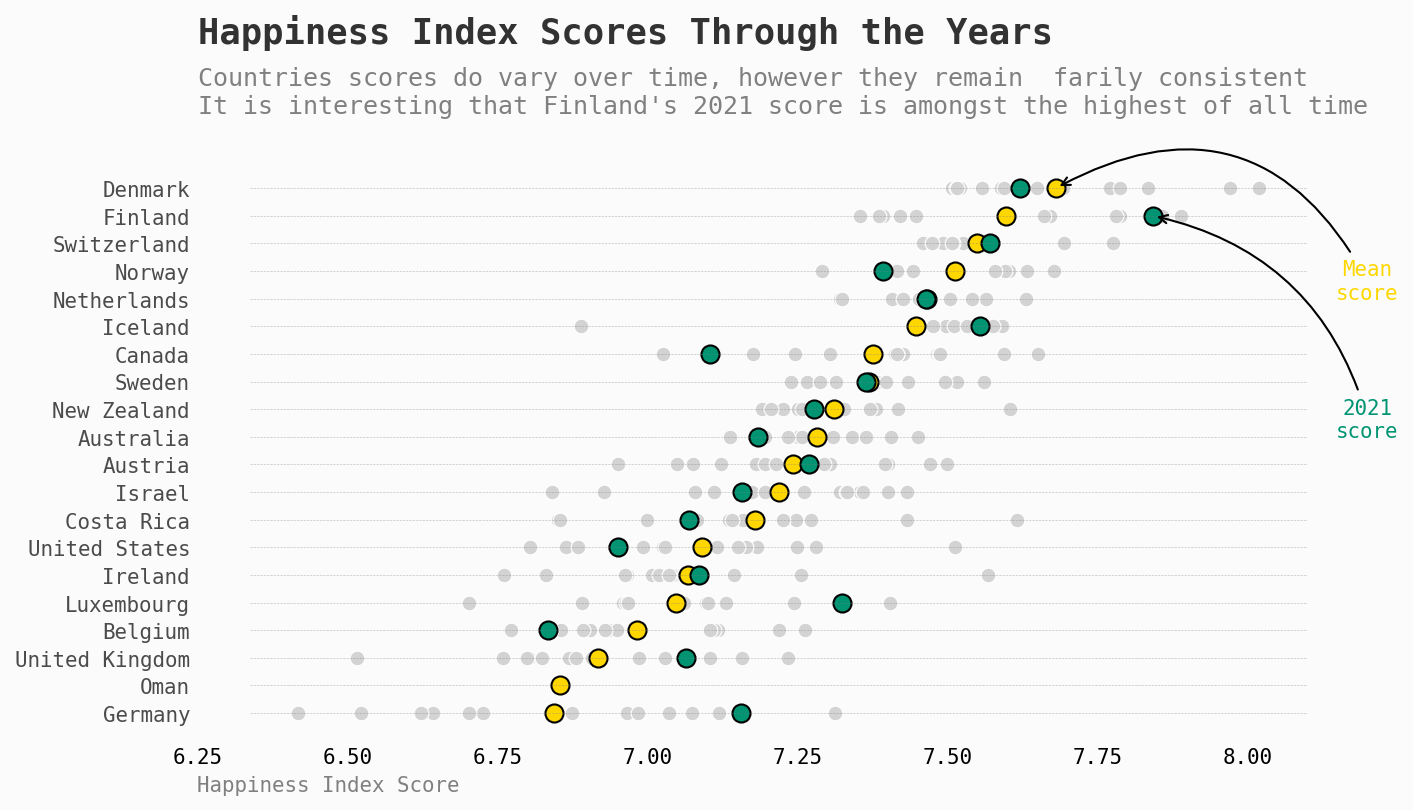

In [13]:
background = "#fbfbfb"
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color
ax.set_facecolor(background)

plot = 1
for country in top_list_['Country']:
    mean = df2[df2['Country'] == country].groupby('Country')['Life Ladder'].mean()
    # historic scores
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x='Life Ladder',  color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x=mean,           color='gold',ec='black',linewidth=1,s=75,ax=ax)
    #2021 score
    sns.scatterplot(data=df[df['Country'] == country],   y=plot, x='Ladder score', color=high_c,ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1

ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",fontfamily='monospace',loc='left',color='gray')

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(6.25, Yend+4.3, 'Happiness Index Scores Through the Years', fontsize=17, fontweight='bold', fontfamily='monospace',color='#323232')
ax.text(6.25, Yend+0.75,
'''
Countries scores do vary over time, however they remain  farily consistent
It is interesting that Finland's 2021 score is amongst the highest of all time
''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.annotate('2021\nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color=high_c)

plt.annotate('Mean\nscore', xy=(7.6804, 20), xytext=(8.2, 16),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='gold')

plt.show()

# Factors Affecting Happiness 

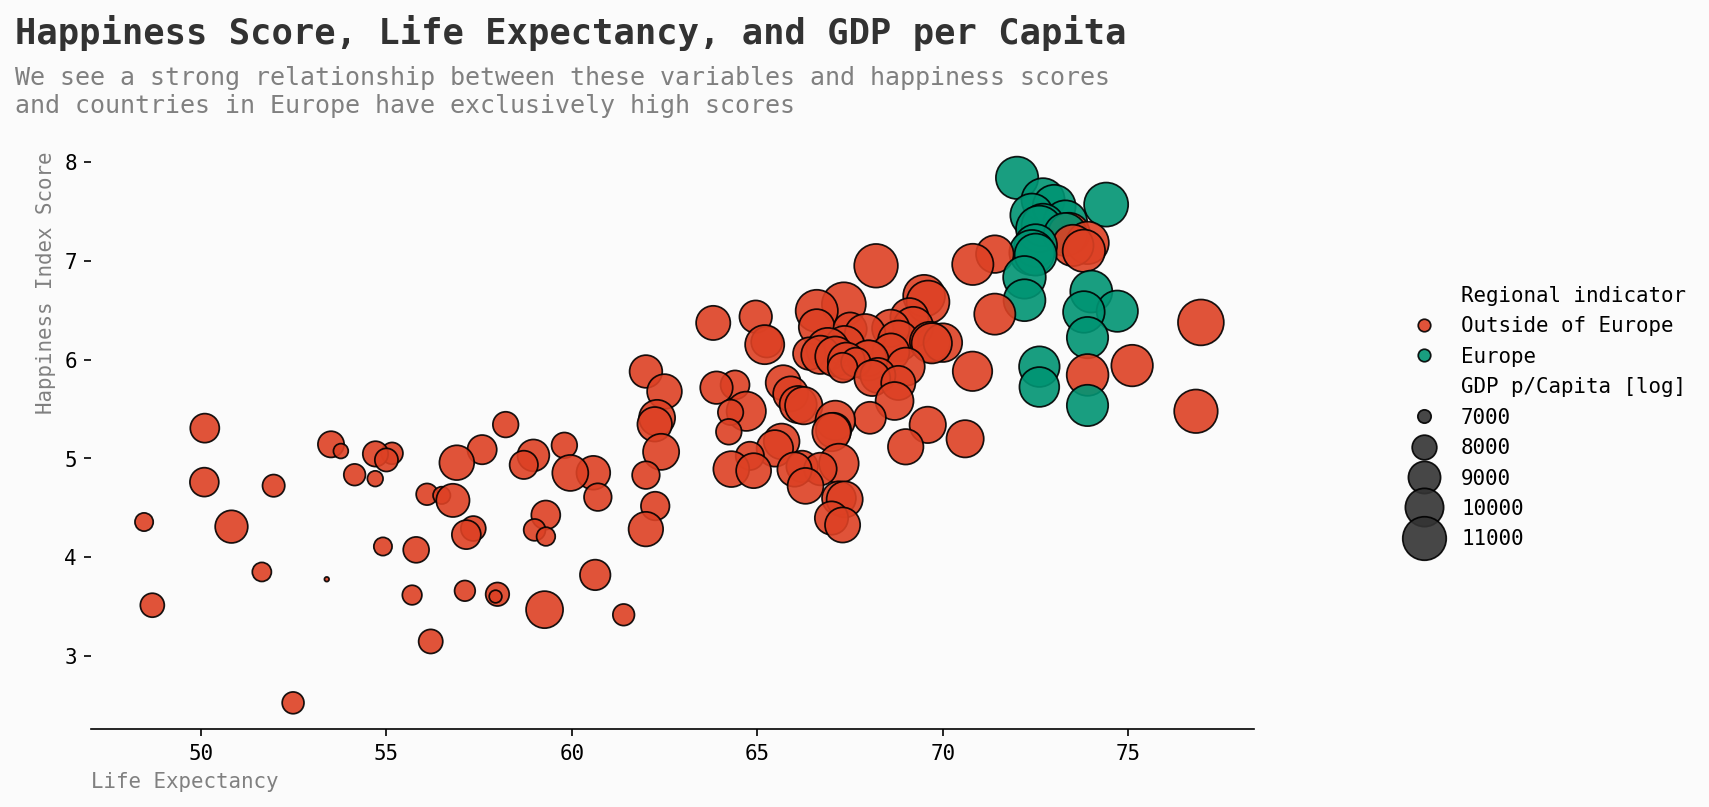

In [15]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
# sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',size=df["Logged GDP per capita"]*1000, legend=True, sizes=(5, 500))
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',size=df["Logged GDP per capita"]*1000, legend=True, sizes=(5, 500))

ax.set_xlabel("Life Expectancy",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(45,9.2,'Happiness Score, Life Expectancy, and GDP per Capita',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(45,8.5,'We see a strong relationship between these variables and happiness scores\nand countries in Europe have exclusively high scores',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('GDP p/Capita [log]')

# ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

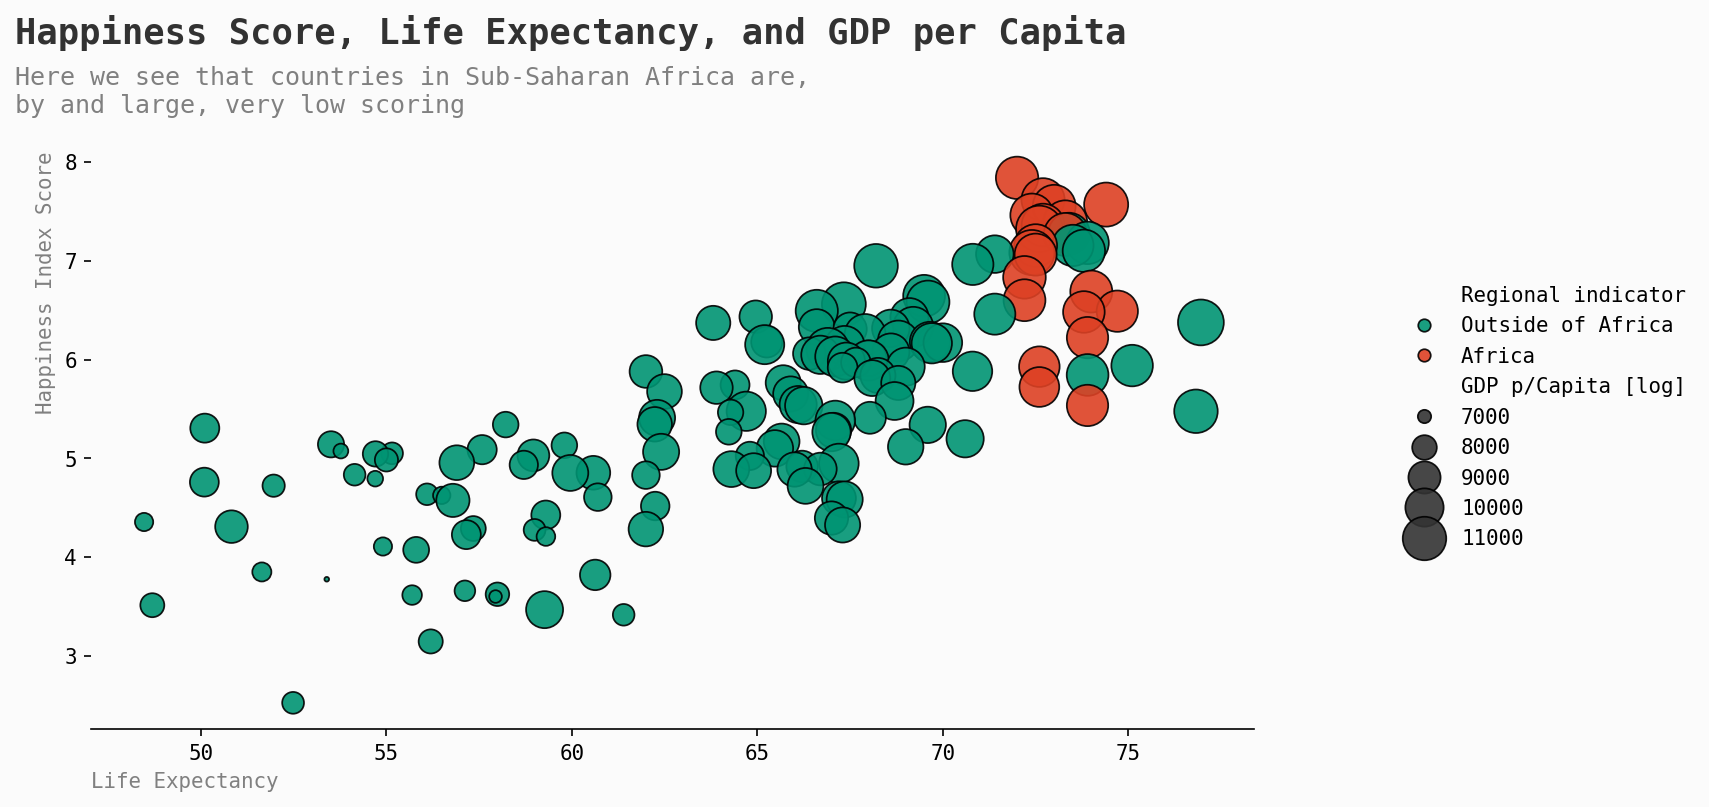

In [16]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [high_c,low_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',size=df["Logged GDP per capita"]*1000, legend=True, sizes=(5, 500))

ax.set_xlabel("Life Expectancy",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(45,9.2,'Happiness Score, Life Expectancy, and GDP per Capita',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(45,8.5,'Here we see that countries in Sub-Saharan Africa are,\nby and large, very low scoring',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Africa')
L.get_texts()[2].set_text('Africa')
L.get_texts()[3].set_text('GDP p/Capita [log]')

# ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

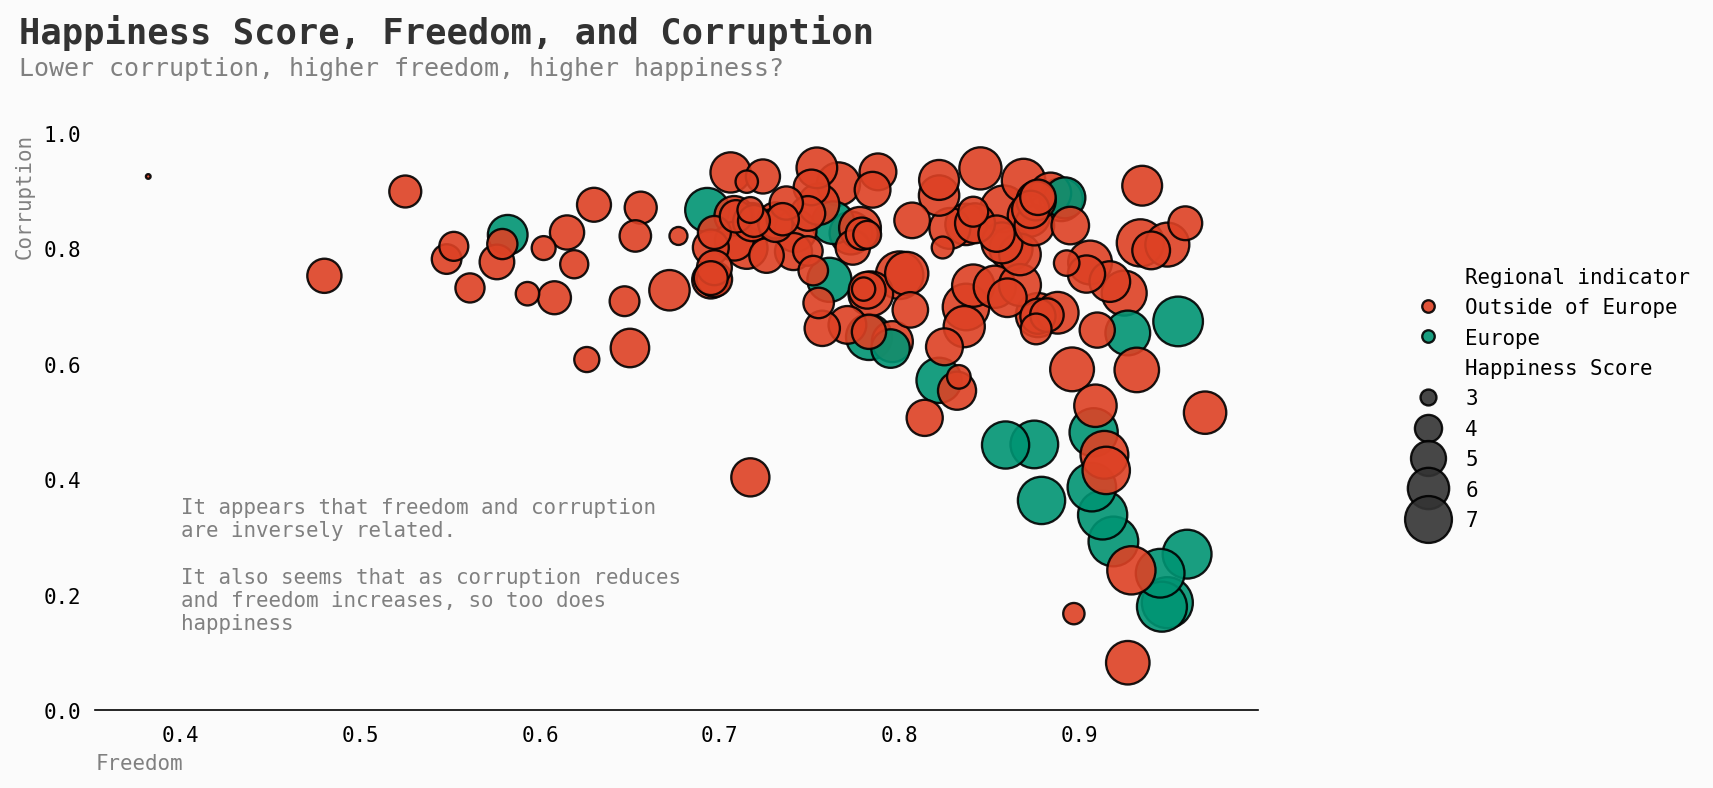

In [17]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

# cmap = [high_c,low_c]
cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Freedom to make life choices', y='Perceptions of corruption',hue=df['Regional indicator'] == 'Western Europe',
                palette=cmap, alpha=0.9,ec='black',size=df['Ladder score'], legend=True, sizes=(5, 600))

ax.set_xlabel("Freedom",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Corruption",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('Happiness Score')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.2, 0.2))

ax.text(0.31,1.155,'Happiness Score, Freedom, and Corruption',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(0.31,1.1,'Lower corruption, higher freedom, higher happiness?',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

ax.text(0.4,0.1,
'''
It appears that freedom and corruption
are inversely related. 

It also seems that as corruption reduces
and freedom increases, so too does
happiness
''',fontfamily='monospace',fontsize=10,color='gray')

# ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

# Continental View

In [19]:
continent_score = df.groupby('Regional indicator')[['Healthy life expectancy',
                            'Logged GDP per capita','Perceptions of corruption',
                            'Freedom to make life choices','Ladder score']].mean().reset_index()
display(continent_score)

Regional indicator  Healthy life expectancy  \
0          Central and Eastern Europe                68.338412   
1  Commonwealth of Independent States                65.009500   
2                           East Asia                71.252167   
3         Latin America and Caribbean                67.076050   
4        Middle East and North Africa                65.609118   
5               North America and ANZ                72.325000   
6                          South Asia                62.681000   
7                      Southeast Asia                64.888444   
8                  Sub-Saharan Africa                55.886472   
9                      Western Europe                73.033095   

   Logged GDP per capita  Perceptions of corruption  \
0              10.109059                   0.850529   
1               9.401833                   0.725083   
2              10.367667                   0.683333   
3               9.370000                   0.792600   
4               9.666118                   0.762235   
5              10.809500                   0.449250   
6               8.682571                   0.797429   
7               9.421444                   0.709111   
8               8.075194                   0.765944   
9              10.822714                   0.523095   

   Freedom to make life choices  Ladder score  
0                      0.797059      5.984765  
1                      0.816917      5.467000  
2                      0.763500      5.810333  
3                      0.831750      5.908050  
4                      0.716471      5.219765  
5                      0.898750      7.128500  
6                      0.765000      4.441857  
7                      0.909000      5.407556  
8                      0.723194      4.494472  
9                      0.858714      6.914905

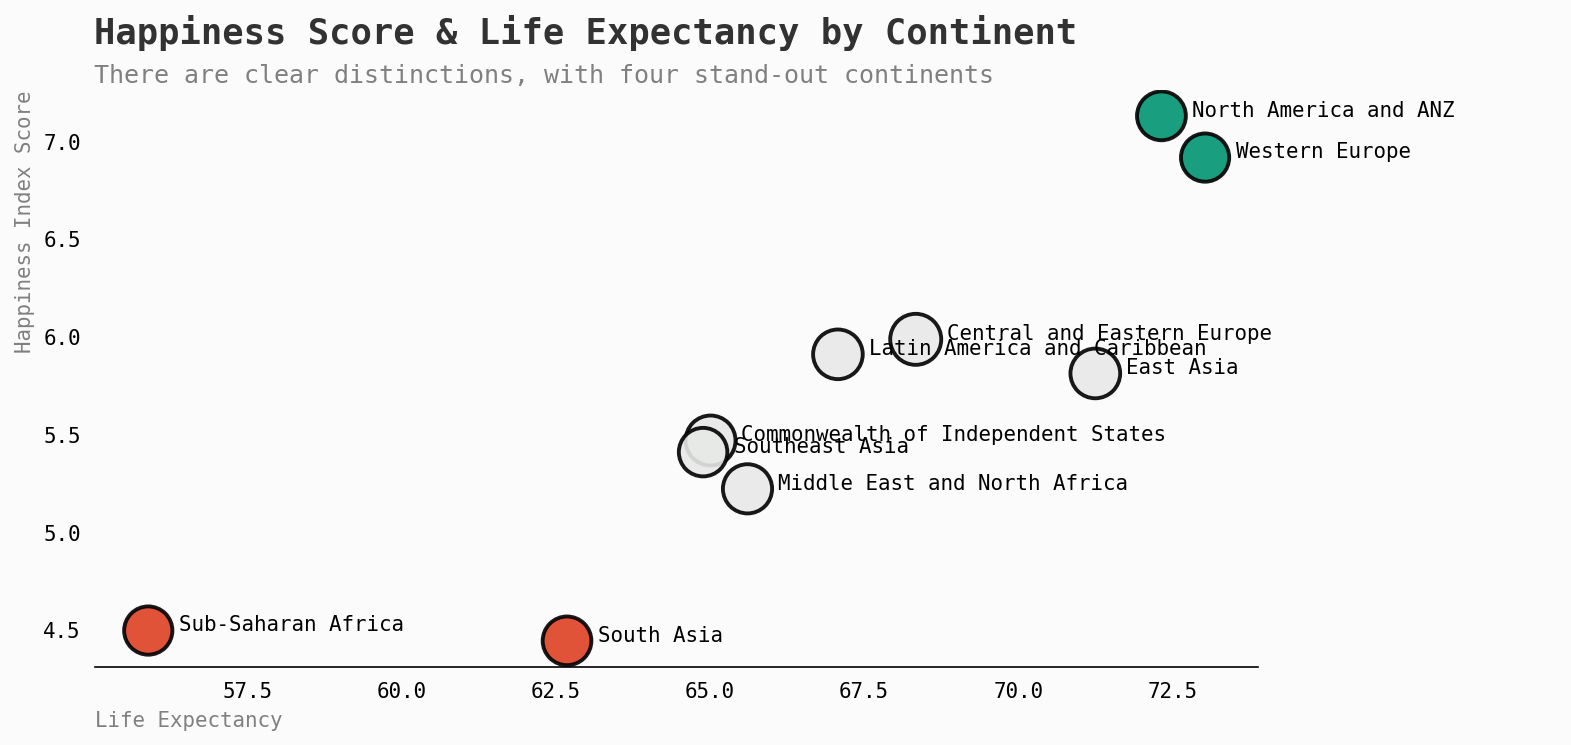

In [20]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

color_map = ['#e7e9e7' for _ in range(10)]
color_map[9] =  high_c # color highlight
color_map[5] =  high_c
color_map[8] =  low_c
color_map[6] =  low_c

ax.set_facecolor(background)
sns.scatterplot(data=continent_score, x=continent_score['Healthy life expectancy'], y=continent_score['Ladder score'],hue=continent_score['Regional indicator'], alpha=0.9,ec='black',palette=color_map,size=df["Ladder score"], legend=False, sizes=(5, 600))

ax.set_xlabel("Life Expectancy",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(55,7.5,'Happiness Score & Life Expectancy by Continent',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(55,7.3,'There are clear distinctions, with four stand-out continents',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

for i, txt in enumerate(continent_score['Regional indicator']):
    ax.annotate(txt, (continent_score['Healthy life expectancy'][i]+0.5, continent_score['Ladder score'][i]),fontfamily='monospace')
    
plt.show()

# Differences between Above & Below the Mean Happiness Level

In [22]:
happiness_mean = df['Ladder score'].mean()

df['lower_happy'] = df['Ladder score'].apply(lambda x: 0 if x < happiness_mean else 1)

In [23]:
df_bottom = df.groupby('Country')[['Logged GDP per capita','Perceptions of corruption',
                                  'Freedom to make life choices','Social support','Ladder score']].mean().sort_values(by='Ladder score',ascending=True)[:10]

df_bottom['Logged GDP per capita'] = df_bottom['Logged GDP per capita']/10
df_bottom['Ladder score'] = df_bottom['Ladder score']/5

display(df_bottom)

categorical = [var for var in df.columns if df[var].dtype=='O']
continuous  = [var for var in df.columns if df[var].dtype!='O']

#refined
continuous = ['Logged GDP per capita',
              'Social support',
              'Healthy life expectancy',
              'Freedom to make life choices',
              'Generosity',
              'Perceptions of corruption']

print("Categorical: ", categorical)
# print(continuous)

Logged GDP per capita  Perceptions of corruption  \
Country                                                         
Afghanistan                 0.7695                      0.924   
Zimbabwe                    0.7943                      0.821   
Rwanda                      0.7676                      0.167   
Botswana                    0.9782                      0.801   
Lesotho                     0.7926                      0.915   
Malawi                      0.6958                      0.729   
Haiti                       0.7477                      0.721   
Tanzania                    0.7876                      0.577   
Yemen                       0.7578                      0.800   
Burundi                     0.6635                      0.607   

             Freedom to make life choices  Social support  Ladder score  
Country                                                                  
Afghanistan                         0.382           0.463        0.5046  
Zimbabwe                            0.677           0.750        0.6290  
Rwanda                              0.897           0.552        0.6830  
Botswana                            0.824           0.784        0.6934  
Lesotho                             0.715           0.787        0.7024  
Malawi                              0.780           0.537        0.7200  
Haiti                               0.593           0.540        0.7230  
Tanzania                            0.833           0.702        0.7246  
Yemen                               0.602           0.832        0.7316  
Burundi                             0.626           0.490        0.7550

Categorical:  ['Country', 'Regional indicator']


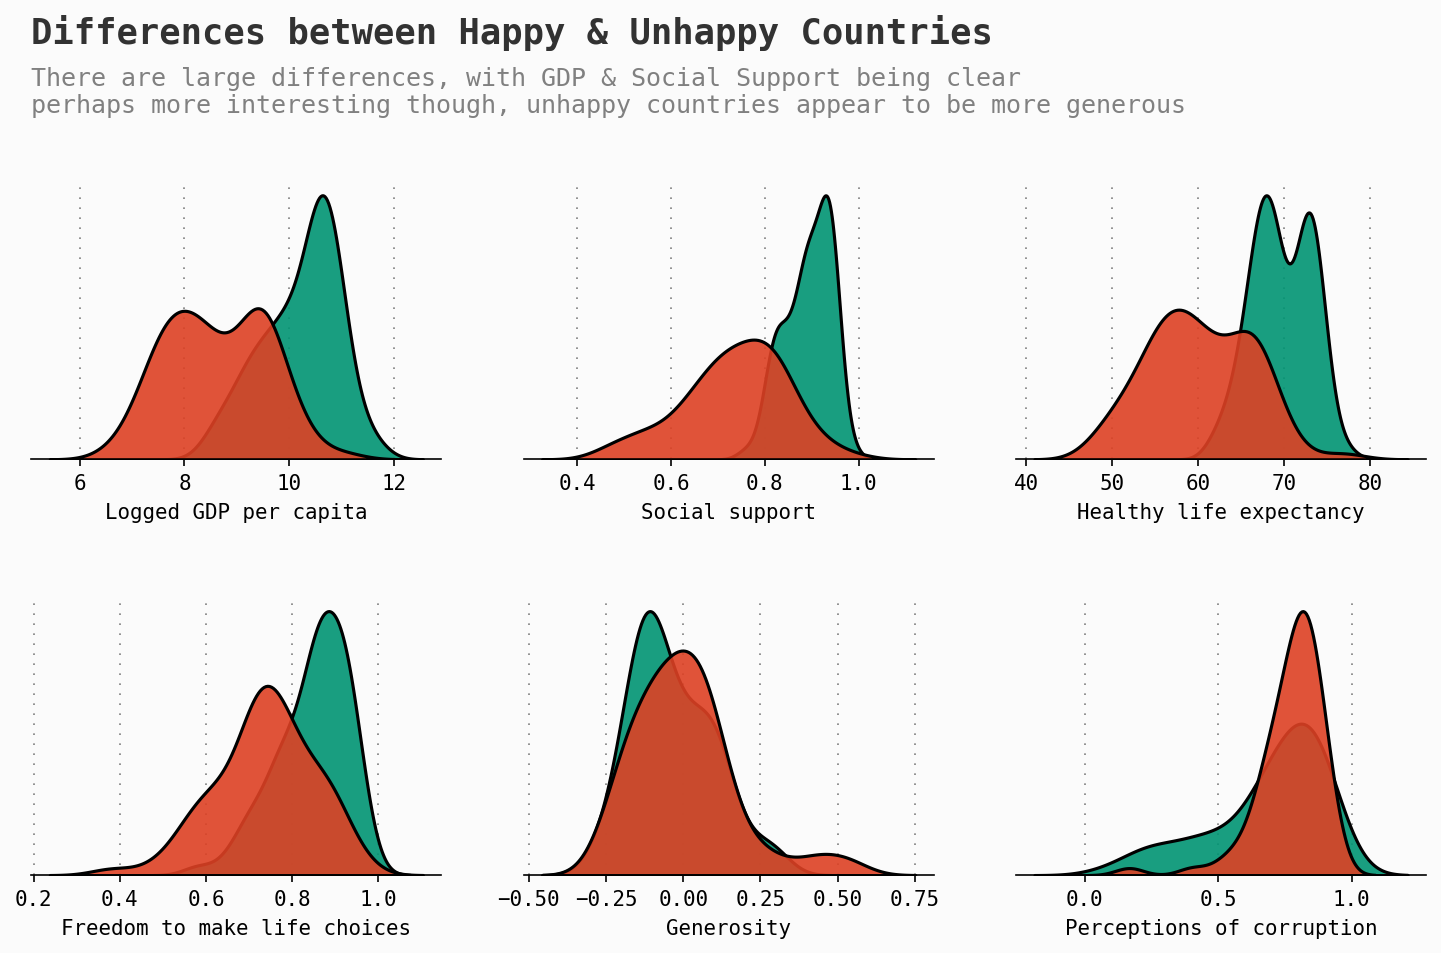

In [24]:
background_color = '#fbfbfb'
fig = plt.figure(figsize=(12, 6), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.5)

plot = 0
for row in range(0, 2):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
Yes  = df[df['lower_happy'] == 1]
No   = df[df['lower_happy'] == 0]

for variable in continuous:
        sns.kdeplot(Yes[variable], ax=locals()["ax"+str(plot)], color=high_c, ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[variable],  ax=locals()["ax"+str(plot)], color=low_c,  shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.5), 'Differences between Happy & Unhappy Countries', fontsize=17, fontweight='bold', fontfamily='monospace',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.25), 'There are large differences, with GDP & Social Support being clear\nperhaps more interesting though, unhappy countries appear to be more generous', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.show()

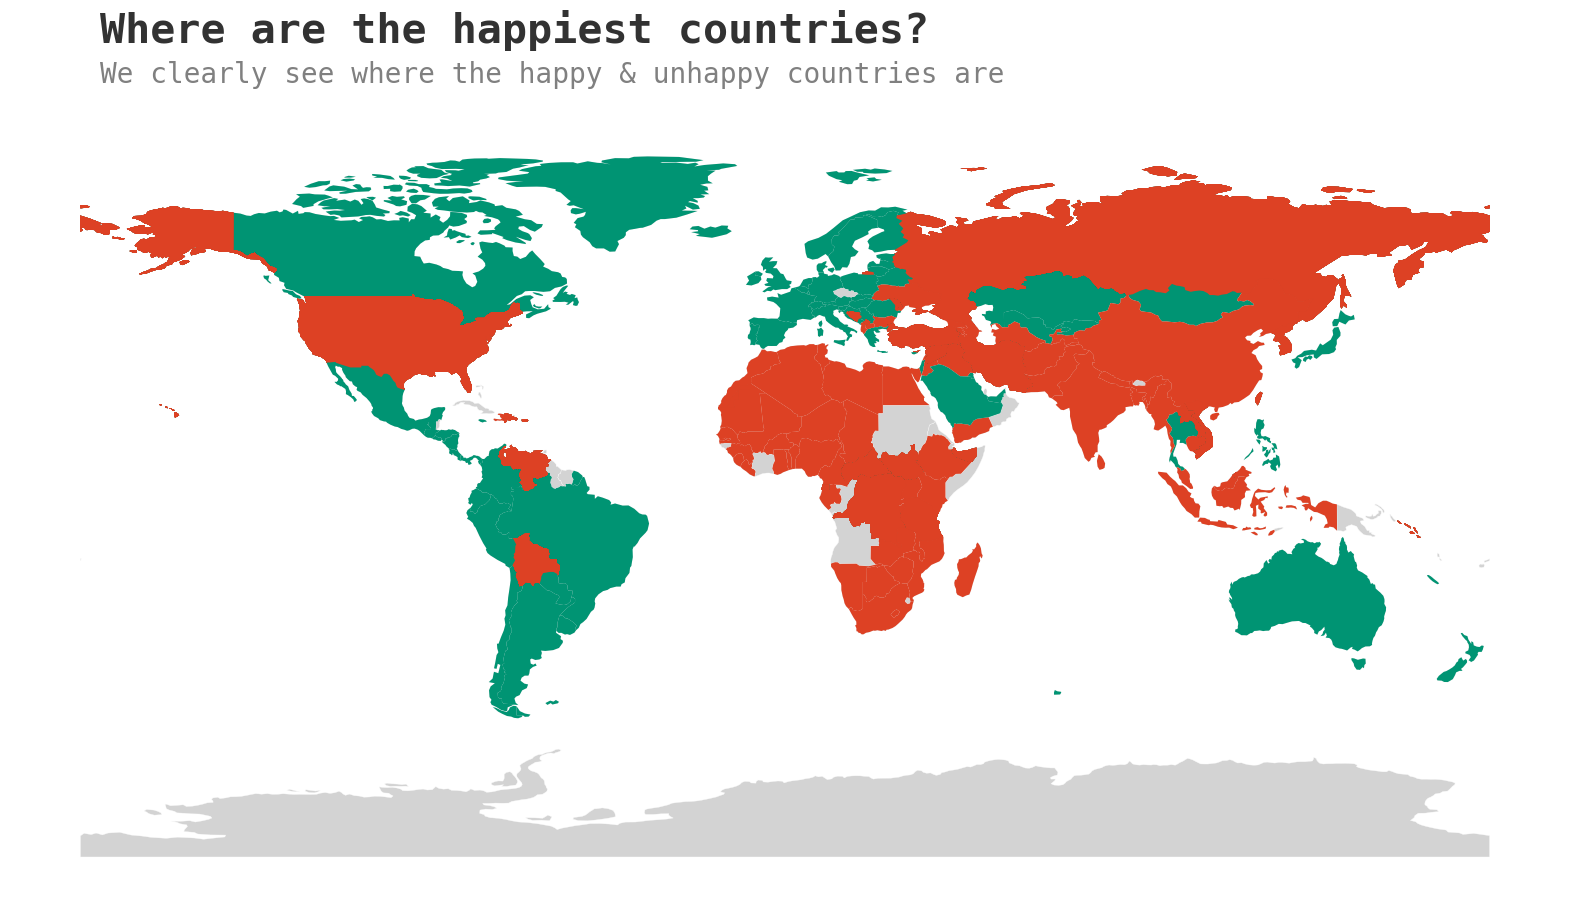

In [25]:
import geopandas
import matplotlib.colors
import pycountry 

#data prep
geo_temp = df

#source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
geo_temp['CODE']=alpha3code(geo_temp['Country'])

# load the shapefile 
path          = "../Python/Input/ne_110m_admin_0_sovereignty/"
world         = geopandas.read_file(path+'ne_110m_admin_0_sovereignty.shp')
world         = world[['CONTINENT', 'NAME', 'geometry']]
world['CODE'] = alpha3code(world['NAME'])
merge=pd.merge(world,geo_temp,on='CODE')

# Custom colour map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [low_c,high_c])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='lower_happy',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)

ax.text(-175,112,'Where are the happiest countries?',fontsize=30,fontweight='bold',fontfamily='monospace',color='#323232')
ax.text(-175,102,'We clearly see where the happy & unhappy countries are',color='gray',fontfamily='monospace',fontsize=20)

plt.show()

# Population

In [27]:
# merge on country
df = pd.merge(df, pop, on='Country')

# removing NA value
df=df[df['Urban Pop %'] != 'N.A.']

# Changing data types, removing % strings etc
df['Urban Pop %'] = df['Urban Pop %'].str.rstrip('%').astype('float') / 100.0
df['World Share'] = df['World Share'].str.rstrip('%').astype('float') / 100.0
df['Yearly Change'] = df['Yearly Change'].str.rstrip('%').astype('float') / 100.0
df['Fert. Rate'] = df['Fert. Rate'].astype('float')
df['Med. Age'] = df['Med. Age'].astype('float')

# Adding in some bins
df['Count'] = 1
df['pop_quantile'] = pd.qcut(df['Population (2020)'], 10, labels=False)
df['density_quantile'] = pd.qcut(df['Density (P/Km²)'], 10, labels=False)

merge_safety = df

# show datasets
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 139
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     137 non-null    object 
 1   Regional indicator                          137 non-null    object 
 2   Ladder score                                137 non-null    float64
 3   Standard error of ladder score              137 non-null    float64
 4   upperwhisker                                137 non-null    float64
 5   lowerwhisker                                137 non-null    float64
 6   Logged GDP per capita                       137 non-null    float64
 7   Social support                              137 non-null    float64
 8   Healthy life expectancy                     137 non-null    float64
 9   Freedom to make life choices                137 non-null    float64
 10  Generosity         

Country  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
135      Lesotho  Sub-Saharan Africa         3.512   
136     Botswana  Sub-Saharan Africa         3.467   
137       Rwanda  Sub-Saharan Africa         3.415   
138     Zimbabwe  Sub-Saharan Africa         3.145   
139  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
135                           0.120         3.748         3.276   
136                           0.074         3.611         3.322   
137                           0.068         3.548         3.282   
138                           0.058         3.259         3.030   
139                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
135                  7.926           0.787                   48.700   
136                  9.782           0.784                   59.269   
137                  7.676           0.552                   61.400   
138                  7.943           0.750                   56.201   
139                  7.695           0.463                   52.493   

     Freedom to make life choices  ...  Density (P/Km²)  Land Area (Km²)  \
0                           0.949  ...               18           303890   
1                           0.946  ...              137            42430   
2                           0.919  ...              219            39516   
3                           0.955  ...                3           100250   
4                           0.913  ...              508            33720   
..                            ...  ...              ...              ...   
135                         0.715  ...               71            30360   
136                         0.824  ...                4           566730   
137                         0.897  ...              525            24670   
138                         0.677  ...               38           386850   
139                         0.382  ...               60           652860   

     Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  World Share  Count  \
0           14000.0         1.5      43.0         0.86       0.0007      1   
1           15200.0         1.8      42.0         0.88       0.0007      1   
2           52000.0         1.5      43.0         0.74       0.0011      1   
3             380.0         1.8      37.0         0.94       0.0000      1   
4           16000.0         1.7      43.0         0.92       0.0022      1   
..              ...         ...       ...          ...          ...    ...   
135        -10047.0         3.2      24.0         0.31       0.0003      1   
136          3000.0         2.9      24.0         0.73       0.0003      1   
137         -9000.0         4.1      20.0         0.18       0.0017      1   
138      

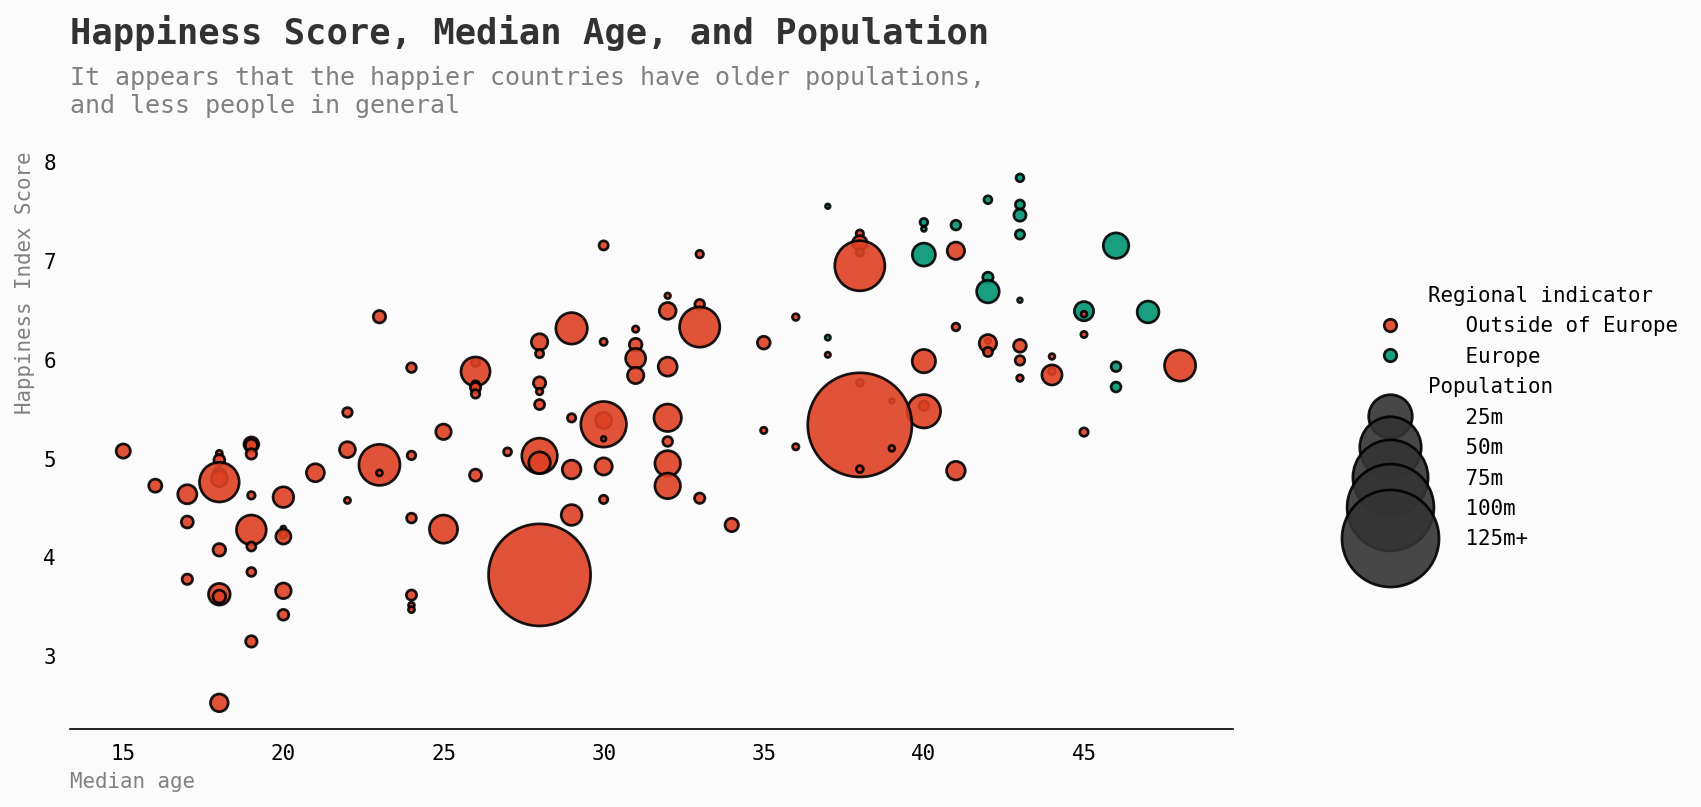

In [28]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Med. Age', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',
                palette=cmap, alpha=0.9,ec='black',linewidth=1.3,size=df["Population (2020)"]*1000, legend=True, sizes=(5, 2500))

ax.set_xlabel("Median age",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

start, end = ax.get_xlim()
    
ax.text(start,9.2,'Happiness Score, Median Age, and Population',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(start,8.5,'It appears that the happier countries have older populations,\nand less people in general',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('   Outside of Europe')
L.get_texts()[2].set_text('   Europe')
L.get_texts()[3].set_text('Population')
L.get_texts()[4].set_text('   25m')
L.get_texts()[5].set_text('   50m')
L.get_texts()[6].set_text('   75m')
L.get_texts()[7].set_text('   100m')
L.get_texts()[8].set_text('   125m+')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

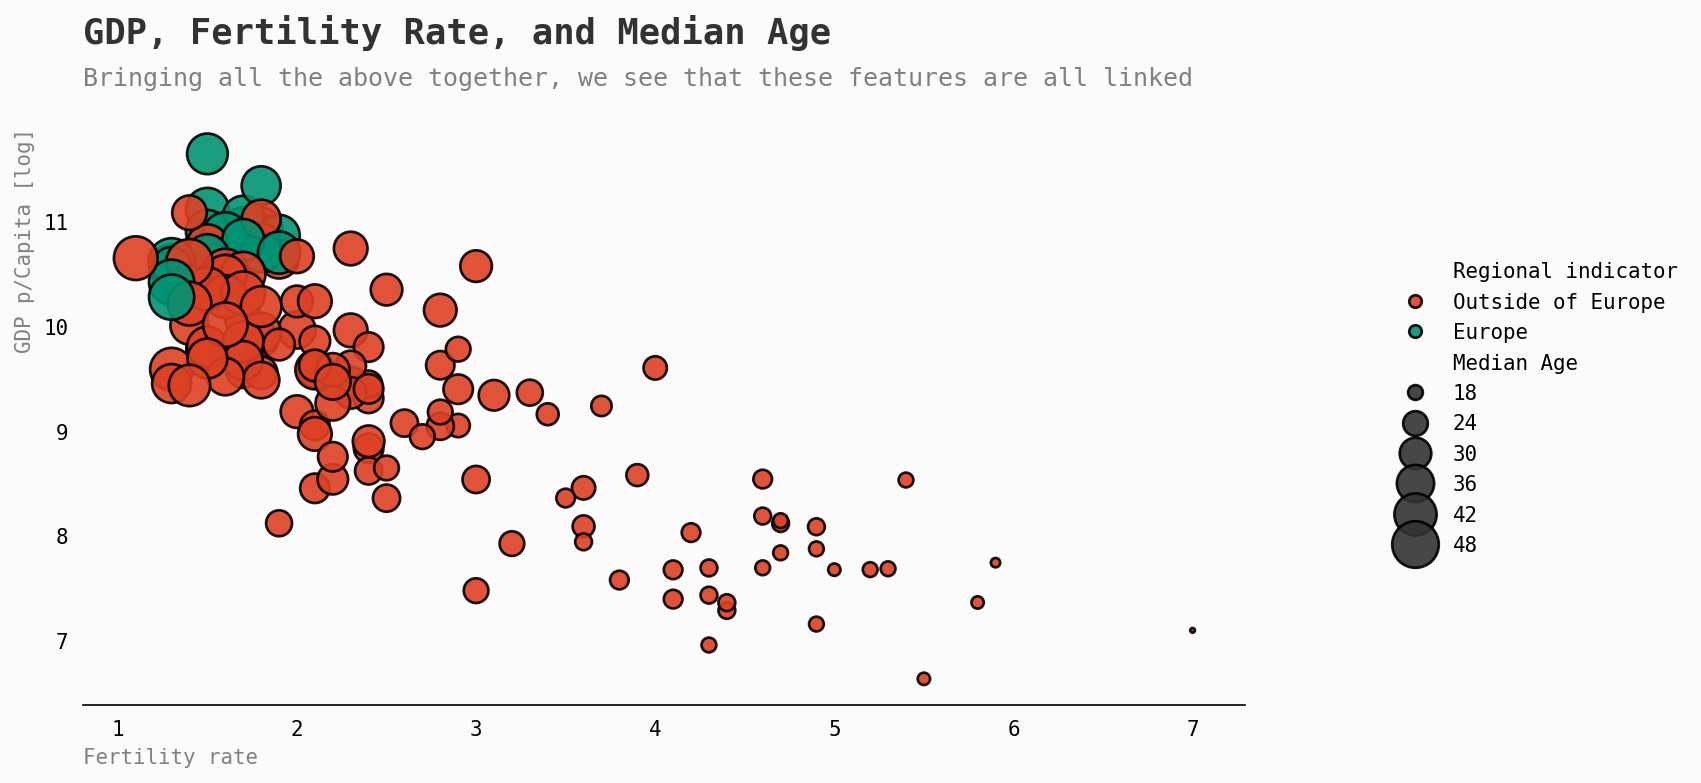

In [29]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Fert. Rate', y='Logged GDP per capita',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',linewidth=1.3,size=df["Med. Age"], legend=True, sizes=(5, 500))

ax.set_xlabel("Fertility rate",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("GDP p/Capita [log]",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

start, end = ax.get_xlim()
    
ax.text(start,12.7,'GDP, Fertility Rate, and Median Age',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(start,12.3,'Bringing all the above together, we see that these features are all linked',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('Median Age')
#L.get_texts()[4].set_text('   25m')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()


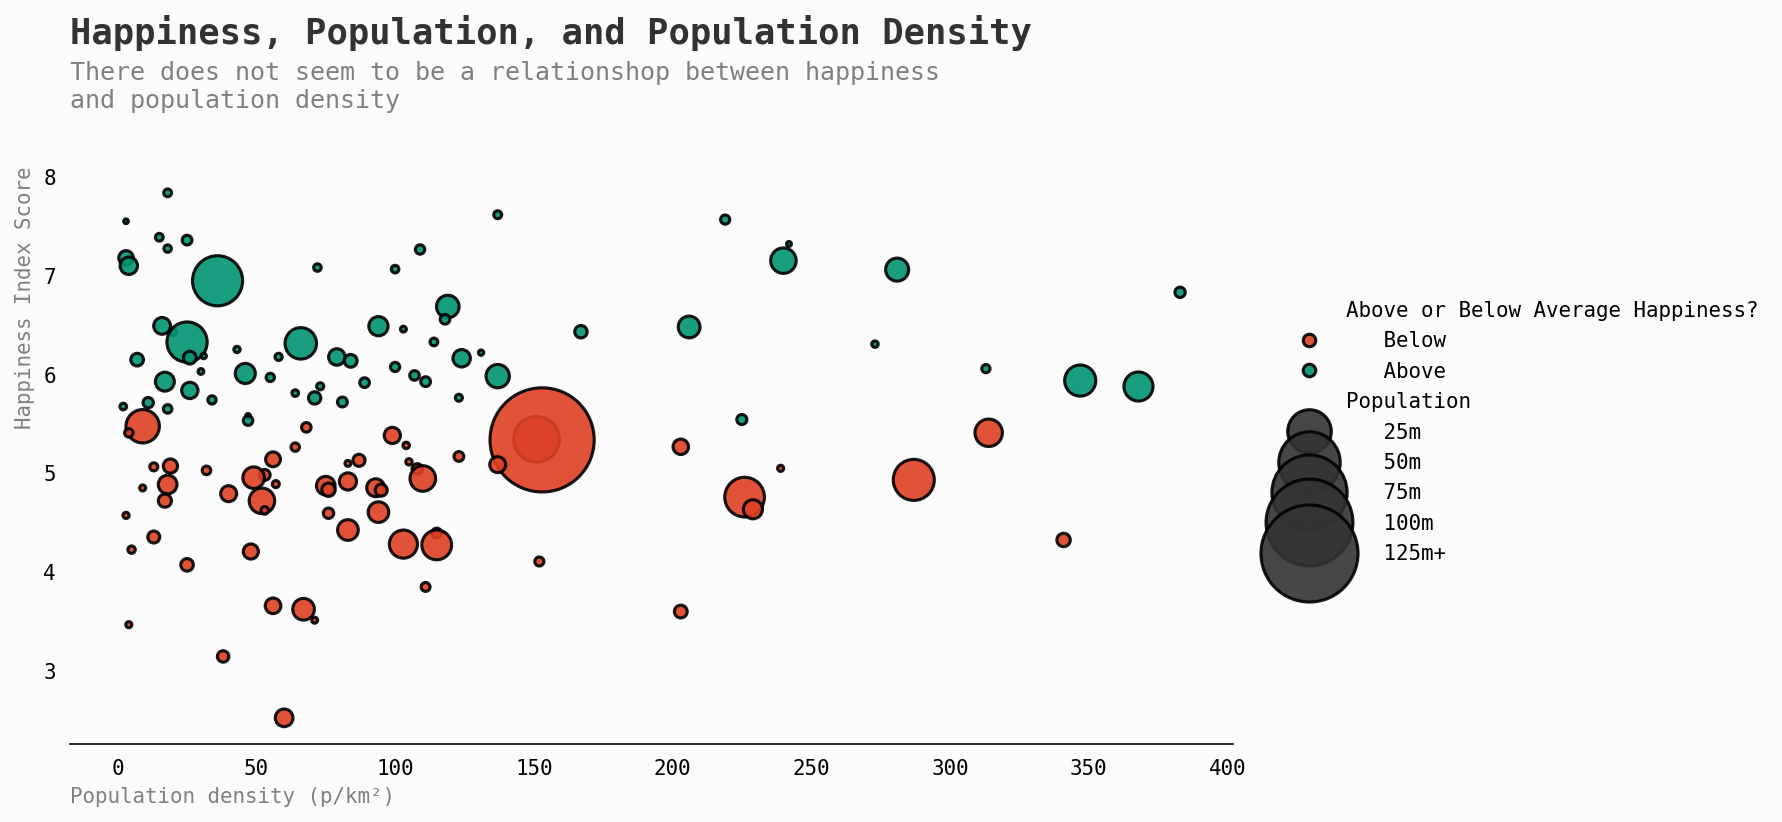

In [30]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

ax.set_facecolor(background)

cmap = [low_c,high_c]

df_plot = df[df['density_quantile'] <9 ]

sns.scatterplot(data=df_plot, x="Density (P/Km²)", y="Ladder score", hue='lower_happy',palette=cmap, size=df_plot["Population (2020)"]*1000, legend=True, sizes=(5, 2500),alpha=0.9,ec='black',linewidth=1.5)

ax.set_xlabel("Population density (p/km²)",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

start, end = ax.get_xlim()
    
ax.text(start,9.35,'Happiness, Population, and Population Density',fontfamily='monospace',fontsize=17,weight='bold',color='#323232')
ax.text(start,8.7,'There does not seem to be a relationshop between happiness\nand population density',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[0].set_text('Above or Below Average Happiness?')
L.get_texts()[1].set_text('   Below')
L.get_texts()[2].set_text('   Above')
L.get_texts()[3].set_text('Population')
L.get_texts()[4].set_text('   25m')
L.get_texts()[5].set_text('   50m')
L.get_texts()[6].set_text('   75m')
L.get_texts()[7].set_text('   100m')
L.get_texts()[8].set_text('   125m+')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

# Do Happiness Change Over Time?

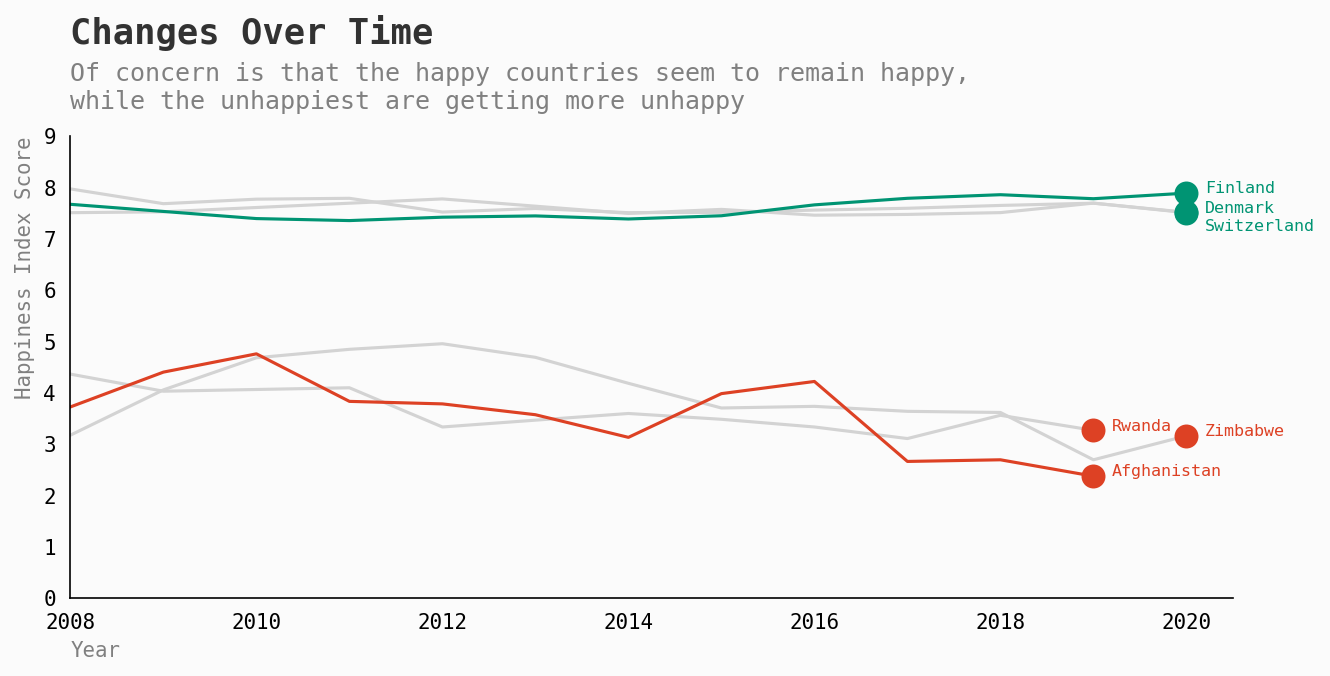

In [32]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_xlabel("Year",fontfamily='monospace',loc='left',color='gray')
ax0.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax0.tick_params(axis='both', which='both', left=False, bottom=False,labelbottom=True) 

#low
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Zimbabwe')],    x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Rwanda')],      x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Afghanistan')], x='year', y='Life Ladder',color=low_c)

#high
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Denmark')],     x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Switzerland')], x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Finland')],     x='year', y='Life Ladder',color=high_c)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.plot(2019,df2[(df2['Country']=='Afghanistan')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Zimbabwe')]['Life Ladder'].reset_index().iloc[-1,-1],    'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)
ax0.plot(2019,df2[(df2['Country']=='Rwanda')]['Life Ladder'].reset_index().iloc[-1,-1],      'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)

ax0.plot(2020,df2[(df2['Country']=='Finland')]['Life Ladder'].reset_index().iloc[-1,-1],     'ko', markersize=10, fillstyle='full',color=high_c,markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Denmark')]['Life Ladder'].reset_index().iloc[-1,-1],     'ko', markersize=10, fillstyle='full',color=high_c, markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Switzerland')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=high_c, markeredgewidth=1.5)

ax0.text(2019.2,df2[(df2['Country']=='Afghanistan')]['Life Ladder'].reset_index().iloc[-1,-1],'Afghanistan',color=low_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Zimbabwe')]['Life Ladder'].reset_index().iloc[-1,-1],   'Zimbabwe',   color=low_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2019.2,df2[(df2['Country']=='Rwanda')]['Life Ladder'].reset_index().iloc[-1,-1],     'Rwanda',     color=low_c,fontfamily='monospace',fontsize=8, rotation=0)

ax0.text(2020.2,df2[(df2['Country']=='Finland')]['Life Ladder'].reset_index().iloc[-1,-1],         'Finland',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Denmark')]['Life Ladder'].reset_index().iloc[-1,-1],         'Denmark',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Switzerland')]['Life Ladder'].reset_index().iloc[-1,-1]-0.35,'Switzerland',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)

ax0.yaxis.set_ticks(np.arange(0, 10, 1))
ax0.set_xlim(left = 2008, right = 2020.5)
plt.xticks(fontname = "monospace")
plt.yticks(fontname = "monospace")

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.2), 'Changes Over Time', fontsize=17, fontweight='bold', fontfamily='monospace',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.06), 
'''
Of concern is that the happy countries seem to remain happy, 
while the unhappiest are getting more unhappy''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.show()

In [33]:
past = df2[['Country','Life Ladder','year']]
pres = df[['Country','Ladder score']]

pres['year'] = 2020
pres.rename(columns={'Ladder score': 'Life Ladder'}, inplace=True)

# combined = past.append(pres, ignore_index=False).sort_values(by='year')
combined = pd.concat([past, pres], ignore_index=False).sort_values(by='year')

seven = combined[combined['year'] == 2007]
seven.rename(columns={'Life Ladder':'07_score'}, inplace=True)
twenty = combined[combined['year'] == 2020]
twenty.rename(columns={'Life Ladder':'20_score'}, inplace=True)

seven  = seven.set_index('Country')
twenty = twenty.set_index('Country')

combined = seven.merge(twenty, on='Country', how='inner', suffixes=('_1', '_2'))
combined['change'] = combined['20_score'] - combined['07_score']

top_inc = combined.groupby('Country')['change'].mean().sort_values(ascending=False)[:10]
top_dec = combined.groupby('Country')['change'].mean().sort_values(ascending=True)[:10]

top_changes = pd.concat([top_inc, top_dec], ignore_index=False).sort_values(ascending=True)
# top_changes = top_inc.append(top_dec, ignore_index=False).sort_values(ascending=True)

# show datasets
# display(past)
# display(pres)
print('Combined Datasets')
display(combined)
# display(top_inc)
# display(top_dec)
print()
print('Top Changes')
display(top_changes)

Combined Datasets


07_score  year_1  20_score  year_2  change
Country                                                    
Chile               5.698    2007     6.172    2020   0.474
Chile               5.698    2007     6.151    2020   0.453
Saudi Arabia        7.267    2007     6.494    2020  -0.773
Saudi Arabia        7.267    2007     6.560    2020  -0.707
North Macedonia     4.494    2007     5.101    2020   0.607
...                   ...     ...       ...     ...     ...
Mongolia            4.609    2007     6.011    2020   1.402
Czech Republic      6.500    2007     6.897    2020   0.397
Ukraine             5.252    2007     4.875    2020  -0.377
Ukraine             5.252    2007     5.270    2020   0.018
Armenia             4.882    2007     5.283    2020   0.401

[165 rows x 5 columns]


Top Changes


Country
Jordan         -1.3535
Malawi         -1.2910
Egypt          -1.1635
India          -1.0050
Greece         -0.8915
Malaysia       -0.8550
Yemen          -0.8190
Saudi Arabia   -0.7400
Pakistan       -0.7370
Turkey         -0.7180
Moldova         1.0140
Nicaragua       1.0280
Hungary         1.0610
Kosovo          1.1900
Mongolia        1.2350
Kyrgyzstan      1.2990
Georgia         1.3000
Serbia          1.3100
Latvia          1.4635
Bulgaria        1.5880
Name: change, dtype: float64

In [34]:
temp = combined.groupby('Country')[['07_score','20_score','change']].mean().sort_values(by='07_score',ascending=False).reset_index()

sample = temp[(temp['Country'] == 'Denmark') | (temp['Country'] == 'United Kingdom') | (temp['Country'] == 'India') | 
         (temp['Country'] == 'Cambodia')     | (temp['Country'] == 'North Cyprus')   | (temp['Country'] == 'South Africa') | 
         (temp['Country'] == 'Malawi')       | (temp['Country'] == 'Niger')          | (temp['Country'] == 'Australia') | 
         (temp['Country'] == 'Guatemala')    | (temp['Country'] == 'Bulgaria')       | (temp['Country'] == 'Chile')  | 
         (temp['Country'] == 'Jordan')]

sample = sample.set_index('Country')

# display(temp)
display(sample)

07_score  20_score  change
Country                                   
Denmark            7.834    7.5675 -0.2665
Australia          7.285    7.1600 -0.1250
United Kingdom     6.802    6.9310  0.1290
Guatemala          6.330    6.4350  0.1050
Chile              5.698    6.1615  0.4635
Jordan             5.598    4.2445 -1.3535
South Africa       5.204    4.9515 -0.2525
India              5.027    4.0220 -1.0050
Malawi             4.891    3.6000 -1.2910
Niger              4.277    5.0740  0.7970
Cambodia           4.156    4.6035  0.4475
Bulgaria           3.844    5.4320  1.5880

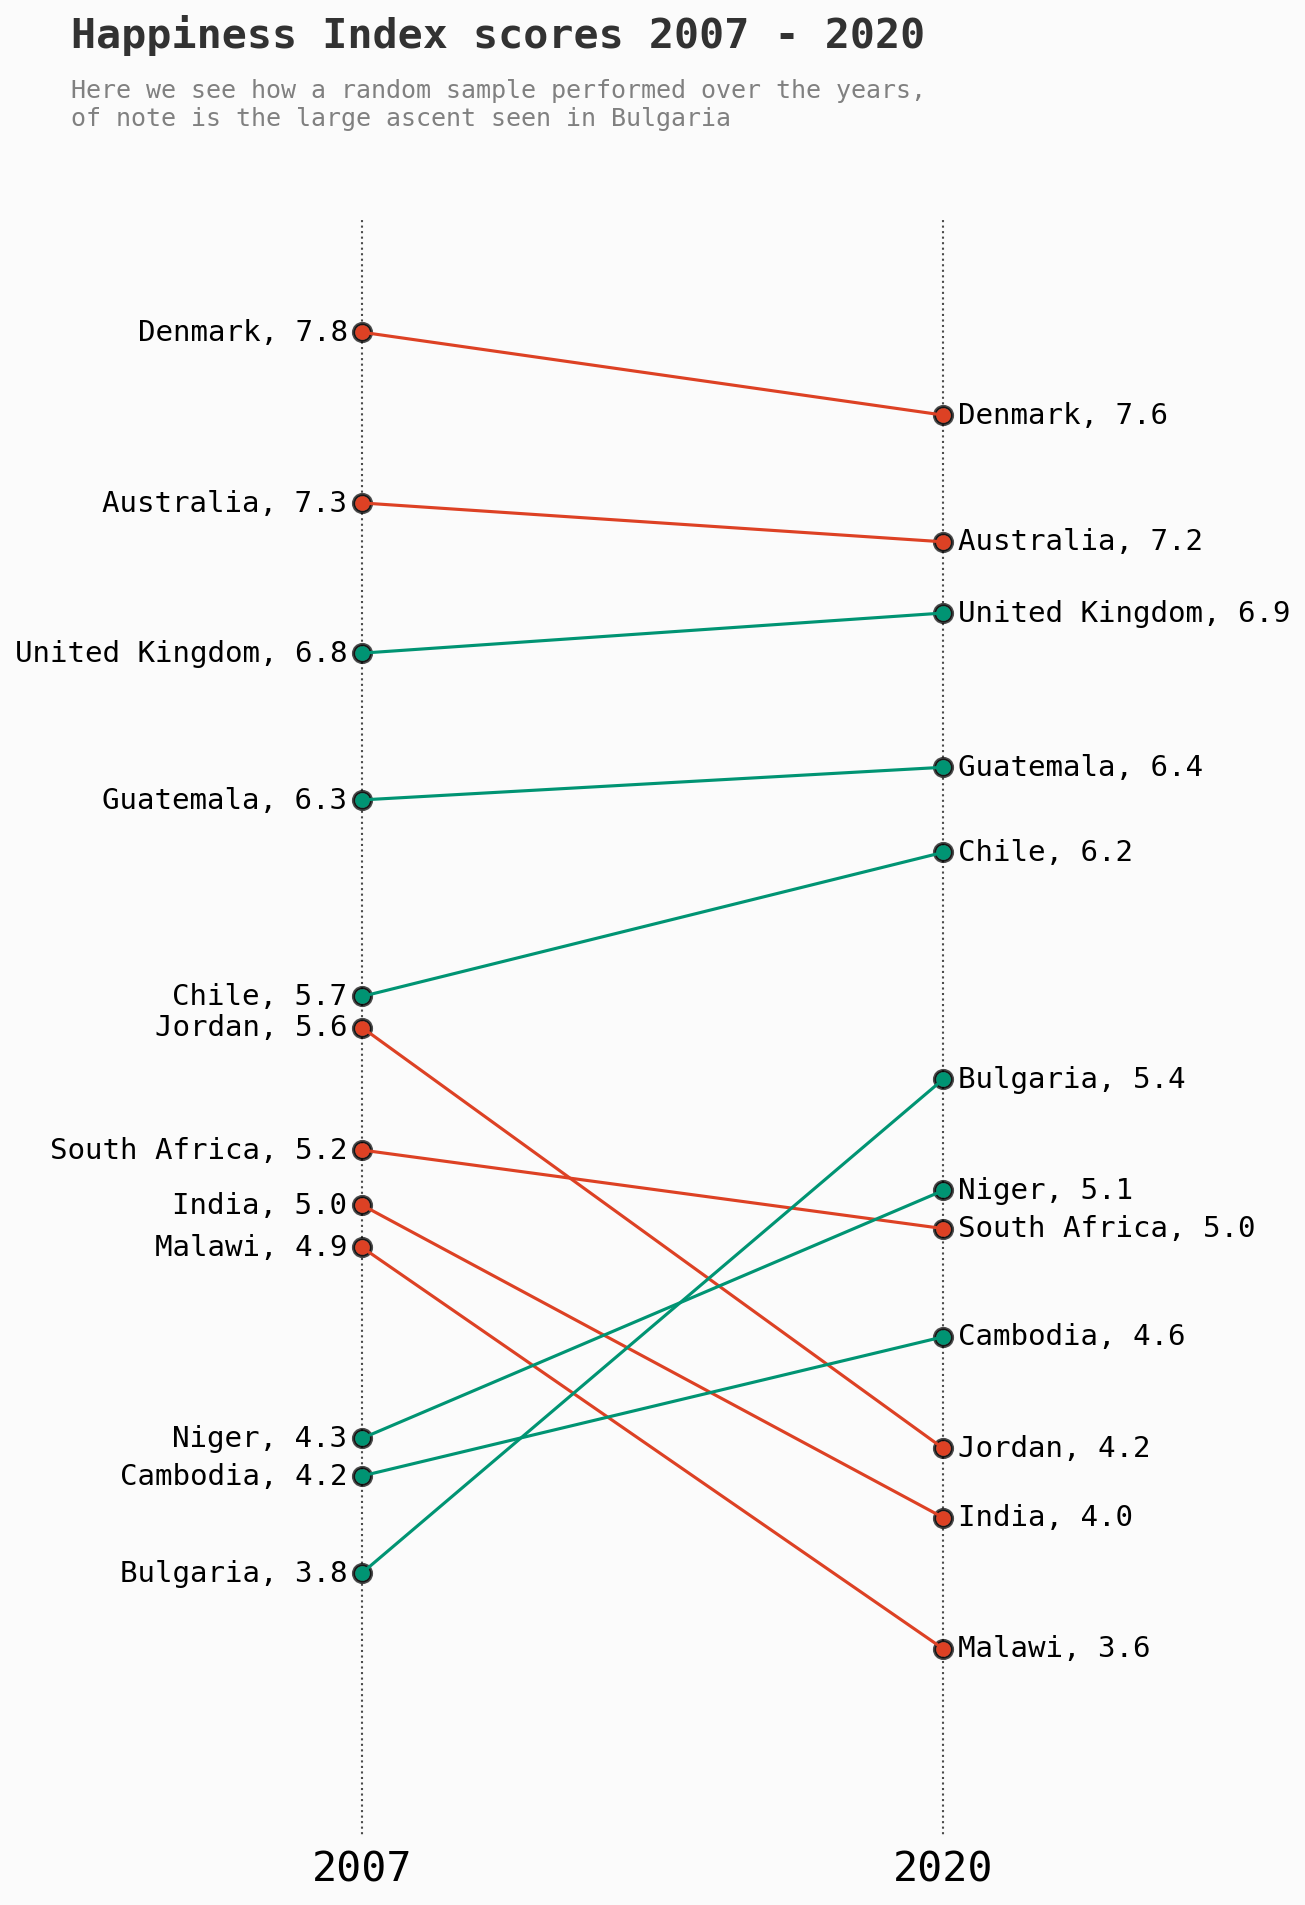

In [35]:
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#18.-Slope-Chart

import matplotlib.lines as mlines

left_label  = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['07_score'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(sample.index, sample['20_score'])]
klass = [low_c if (y1-y2) < 0 else high_c for y1, y2 in zip(sample['07_score'], sample['20_score'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=low_c if p1[1]-p2[1] > 0 else high_c, marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,14), dpi= 150, facecolor=background_color)

ax.set_facecolor(background_color)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=9, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=9, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=sample['07_score'], x=np.repeat(1, sample.shape[0]), s=75, linewidth=1.5, color='black', alpha=0.7)
ax.scatter(y=sample['20_score'], x=np.repeat(3, sample.shape[0]), s=75, linewidth=1.5,color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(sample['07_score'], sample['20_score'], sample.index):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1,1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2,1)), horizontalalignment='left',  verticalalignment='center', fontdict={'size':14})

ax.text(0,8.75,"Happiness Index scores 2007 - 2020", fontsize=20, fontfamily='monospace',fontweight='bold',color='#323232')
ax.text(0,8.5, 
'''
Here we see how a random sample performed over the years, 
of note is the large ascent seen in Bulgaria''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

ax.set(xlim=(0,4), ylim=(3,8.2), ylabel='')
ax.set_xticks([1,3])
ax.set_xticklabels(["2007", "2020"],fontsize=20)
plt.yticks(np.arange(3, 8.2, 2), fontsize=12)

for s in ["top","right","left","bottom"]:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis='both',which='both',left=False,bottom=False,labelleft=False) 
plt.rcParams["font.family"] = "monospace"

plt.show()

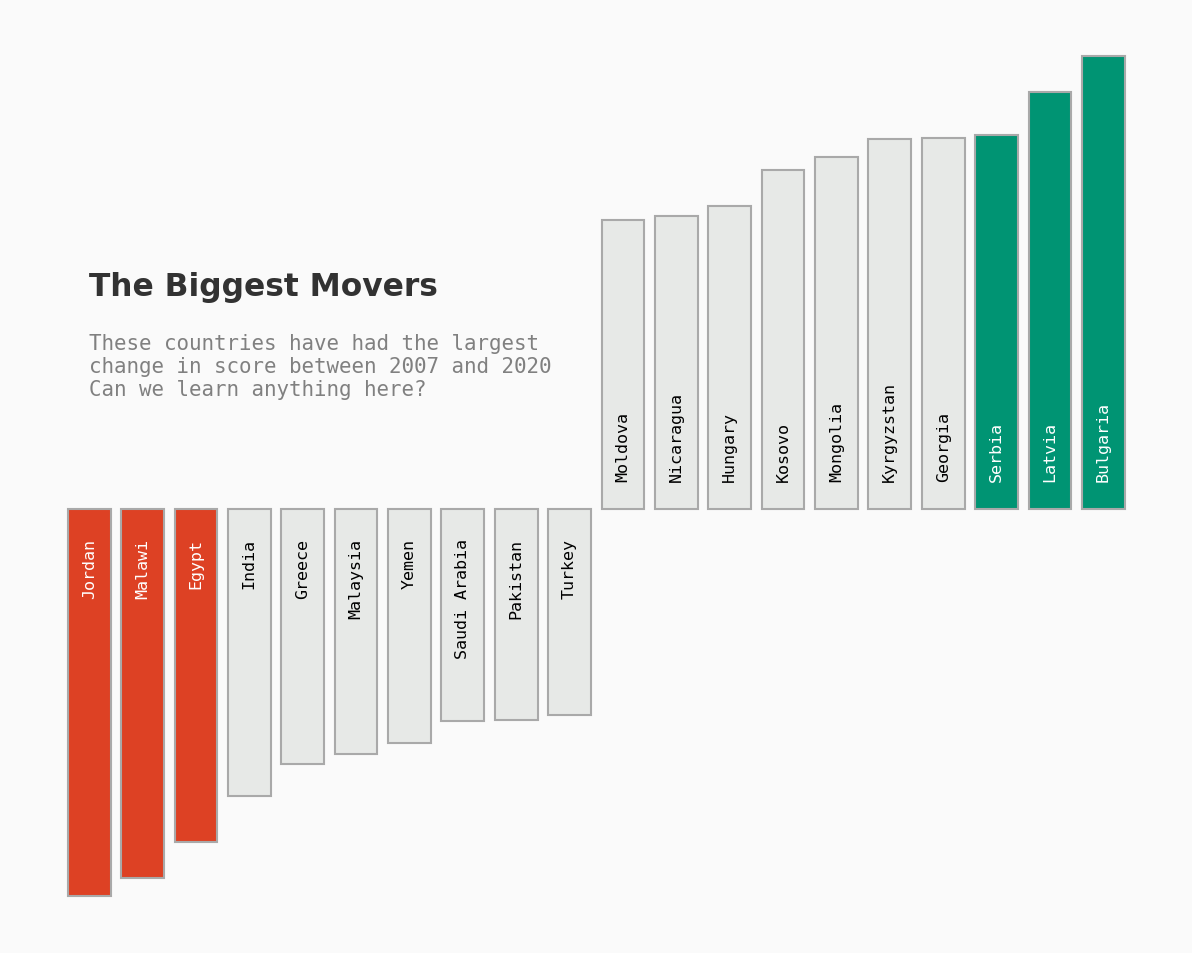

In [36]:
fig = plt.figure(figsize=(10,8),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Plots 
# Happiest
data = top_changes

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  low_c # color highlight
color_map[17] = color_map[18] = color_map[19] =  high_c

#base
ax0.bar(data.index, data, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)

# actual
ax0.bar(data.index, data, 
       edgecolor='darkgray',color=color_map)

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

for s in ['top','left', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)    

# bottom
for i in range(0,3):
    ax0.annotate(list(data.index)[i], 
                   xy=(i, -0.1), 
                   va = 'top', ha='center',fontweight='light',fontsize=8, color='white',rotation=90)

for i in range(3,10):
    ax0.annotate(list(data.index)[i], 
                   xy=(i, -0.1), 
                   va = 'top', ha='center',fontweight='light',fontsize=8, color='black',rotation=90)

# top
for i in range(17,20):
    ax0.annotate(list(data.index)[i], 
                   xy=(i, 0.1), 
                   va = 'bottom', ha='center',fontweight='light',fontsize=8, color='white',rotation=90)

for i in range(10,17):
    ax0.annotate(list(data.index)[i], 
                   xy=(i, 0.1), 
                   va = 'bottom', ha='center',fontweight='light',fontsize=8, color='black',rotation=90)

ax0.text(0,0.75,'The Biggest Movers',fontfamily='sans-serif',fontsize=15,fontweight='bold',color='#323232')
ax0.text(0,0.4,'These countries have had the largest\nchange in score between 2007 and 2020\nCan we learn anything here?',fontfamily='monospace',fontsize=10,fontweight='light',color='gray')

plt.show()

In [37]:
# only top movers
top_ch_list = list(top_changes.reset_index()['Country'])

pre_post = seven.merge(twenty, on='Country', how='inner', suffixes=('_1', '_2')).reset_index()

pre_post = pre_post[pre_post['Country'].isin(top_ch_list)]
pre_post = pre_post.drop_duplicates(subset=['Country'], keep='first')

pre_post['change'] = pre_post['20_score'] - pre_post['07_score']
pre_post.sort_values(by='change')
pre_post = pre_post.set_index('Country')

# display(top_ch_list)
display(pre_post)

07_score  year_1  20_score  year_2  change
Country                                                 
Saudi Arabia     7.267    2007     6.494    2020  -0.773
Hungary          4.954    2007     5.992    2020   1.038
Kosovo           5.104    2007     6.294    2020   1.190
Yemen            4.477    2007     3.658    2020  -0.819
India            5.027    2007     3.819    2020  -1.208
Egypt            5.541    2007     4.283    2020  -1.258
Pakistan         5.671    2007     4.934    2020  -0.737
Serbia           4.750    2007     6.078    2020   1.328
Nicaragua        4.944    2007     5.972    2020   1.028
Latvia           4.667    2007     6.032    2020   1.365
Kyrgyzstan       4.698    2007     5.744    2020   1.046
Greece           6.647    2007     5.723    2020  -0.924
Bulgaria         3.844    2007     5.266    2020   1.422
Malawi           4.891    2007     3.600    2020  -1.291
Malaysia         6.239    2007     5.384    2020  -0.855
Georgia          3.707    2007     4.891    2020   1.184
Jordan           5.598    2007     4.395    2020  -1.203
Turkey           5.623    2007     4.948    2020  -0.675
Moldova          4.775    2007     5.766    2020   0.991
Mongolia         4.609    2007     5.677    2020   1.068

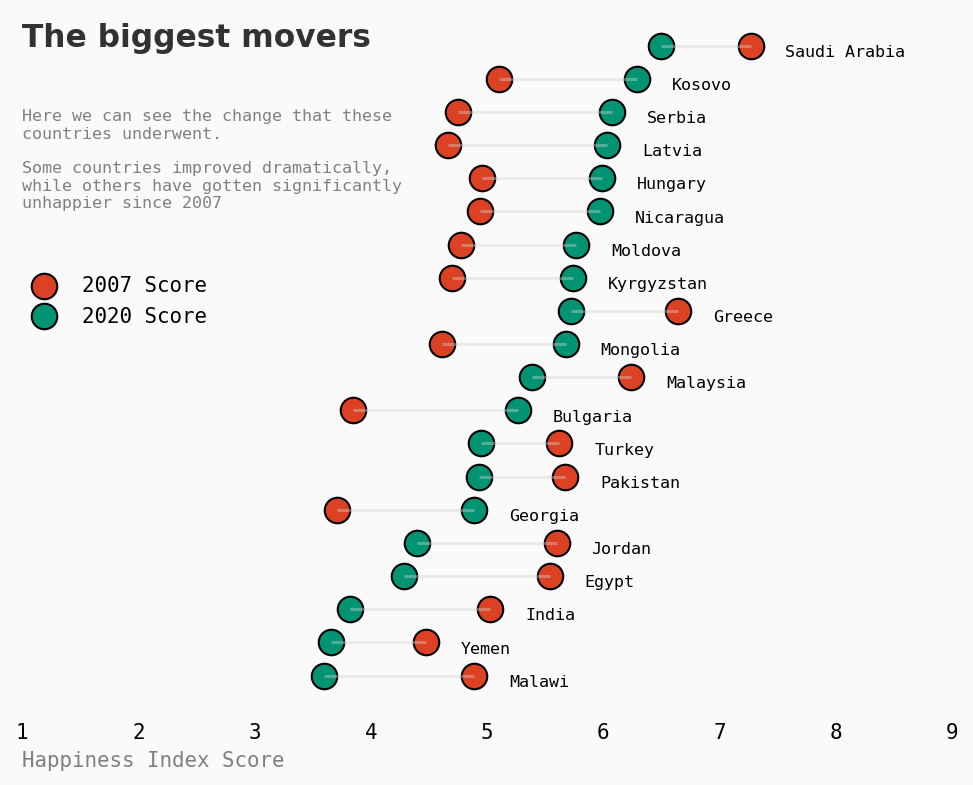

In [38]:
fig = plt.figure(figsize=(8,6),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

value1 = pre_post['07_score']
value2 = pre_post['20_score']

# Reorder it following the values of the first value:
ordered_df = pre_post.sort_values(by='20_score')
my_range=range(1,len(ordered_df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['07_score'], xmax=ordered_df['20_score'], color='lightgray', alpha=0.4)
plt.scatter(ordered_df['07_score'], my_range, color=low_c, alpha=1, ec='black',label='2007 Score',s=150)
plt.scatter(ordered_df['20_score'], my_range, color=high_c, alpha=1 , ec='black', label='2020 Score',s=150)

ax0.set_yticklabels([])
#plt.locator_params(nbins=10)

for i in range(20):
    ax0.annotate(list(ordered_df.index)[i], 
                   xy=((ordered_df[["07_score", "20_score"]].max(axis=1)[i]+0.3),i+0.6), 
                   va = 'bottom', ha='left',fontweight='light', fontfamily='monospace',fontsize=8, color='black',rotation=0)
    
Xstart, Xend = ax0.get_xlim()
ax0.xaxis.set_ticks(np.arange(1, 10, 1))

#ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

# Remove border from plot
for s in ['top','left', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.set_xlabel("Happiness Index Score",fontfamily='monospace',loc='left',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
    
ax0.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

L = ax0.legend(frameon=False,loc="upper center", bbox_to_anchor=(0.1, 0.65), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
#L.get_texts()[1].set_text('Outside of Europe')
#L.get_texts()[2].set_text('Europe')

ax0.text(1,20,'The biggest movers',fontfamily='sans-serif',fontsize=15,fontweight='bold',color='#323232')
ax0.text(1,14.6,
'''
Here we can see the change that these
countries underwent.

Some countries improved dramatically, 
while others have gotten significantly
unhappier since 2007
''',fontfamily='monospace',fontsize=8,fontweight='light',color='gray')

plt.show()

In [39]:
c1 = 'Jordan'
c2 = 'Bulgaria'

# filter data
df = df2.loc[(df2['Country']==c1) | (df2['Country']==c2)]
# df = df2.loc[(df2['year']>2008)]
df = df.loc[(df2['year']>2008)]
df = pd.pivot_table(df, values='Life Ladder', index=['year'], columns=['Country'])

display(df)

Country  Bulgaria  Jordan
year                     
2009          NaN   6.000
2010        3.912   5.570
2011        3.875   5.539
2012        4.222   5.132
2013        3.993   5.172
2014        4.438   5.333
2015        4.865   5.405
2016        4.838   5.271
2017        5.097   4.808
2018        5.099   4.639
2019        5.108   4.453
2020        5.598   4.094

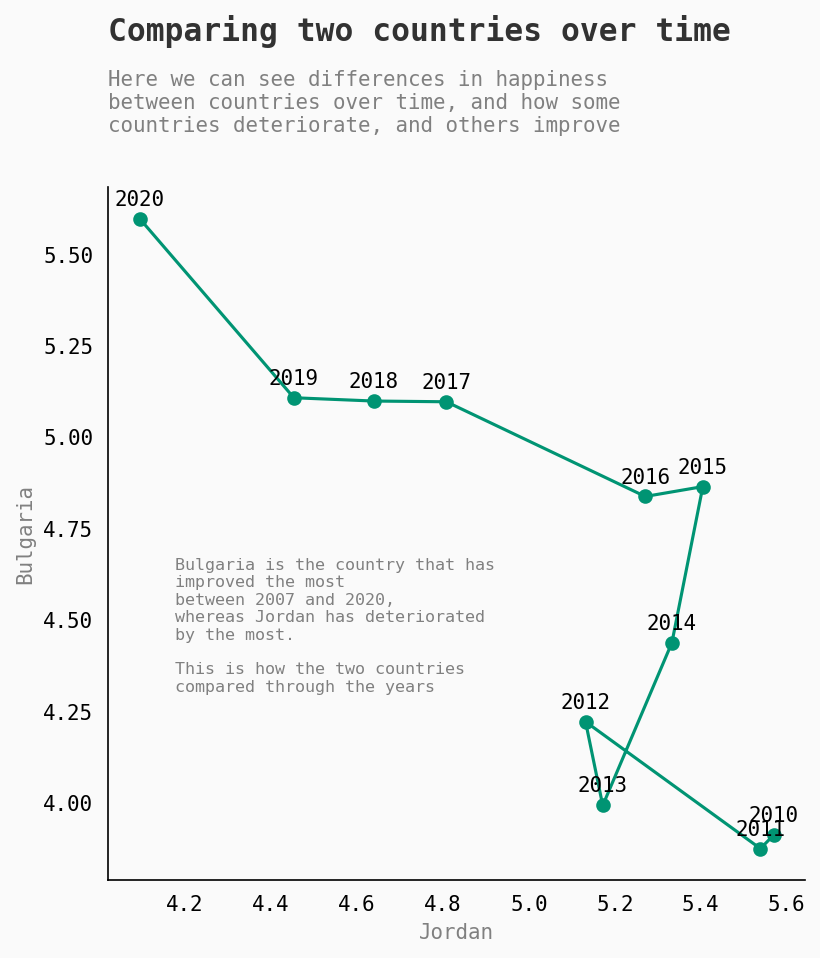

In [40]:
fig = plt.figure(figsize=(6,6),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

# plot the connected scatterplot
plt.plot(df[c1], df[c2], '-', marker='o',color=high_c)

# add annotations 
for line in range(0, df.shape[0], 1):
     plt.annotate(
          df.index[line], 
          (df[c1].iloc[line], df[c2].iloc[line]+0.025) ,
          va='bottom',
          ha='center',fontfamily='monospace'
     ) 

for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
#ax0.xaxis.set_ticks(np.arange(1, 10, 1))
ax0.set_ylabel(f"{c2}",fontfamily='monospace',loc='top',color='gray')
ax0.set_xlabel(f"{c1}",fontfamily='monospace',loc='left',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax0.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart,Yend+0.4,'Comparing two countries over time',fontsize=15,fontweight='bold',color='#323232')
ax0.text(Xstart,Yend+0.15,'Here we can see differences in happiness\nbetween countries over time, and how some\ncountries deteriorate, and others improve',fontsize=10,fontfamily='monospace',color='gray')

fig.text(0.2,0.3,
'''
Bulgaria is the country that has
improved the most 
between 2007 and 2020, 
whereas Jordan has deteriorated 
by the most. 

This is how the two countries
compared through the years
''',fontfamily='monospace',fontsize=8,color='gray')

# x axis label
plt.xlabel(c1)

# y axis label
plt.ylabel(c2)

# show the graph
plt.show()

In [41]:
safety['bin'] = safety['Ladder score'].apply(lambda x: '0-3' if x <= 3 else '3-5' if x <= 5 else '5-7' if x <= 7 else '7+')

bin_order = ['0-3','3-5','5-7','7+']

cont_order = ['Western Europe', 'North America and ANZ',
              'Middle East and North Africa', 'Latin America and Caribbean',
              'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
              'Commonwealth of Independent States', 'Sub-Saharan Africa',
              'South Asia']

safety['count'] = 1

data_matrix = pd.pivot_table(safety, values='count', index=['Regional indicator'], 
                             columns=['bin'], aggfunc=np.sum).fillna(0).astype(int).loc[cont_order, bin_order].stack()

# display(safety)
display(data_matrix)

Regional indicator                  bin
Western Europe                      0-3     0
                                    3-5     0
                                    5-7     9
                                    7+     12
North America and ANZ               0-3     0
                                    3-5     0
                                    5-7     1
                                    7+      3
Middle East and North Africa        0-3     0
                                    3-5    11
                                    5-7     5
                                    7+      1
Latin America and Caribbean         0-3     0
                                    3-5     2
                                    5-7    17
                                    7+      1
Central and Eastern Europe          0-3     0
                                    3-5     0
                                    5-7    17
                                    7+      0
East Asia                           0-3 

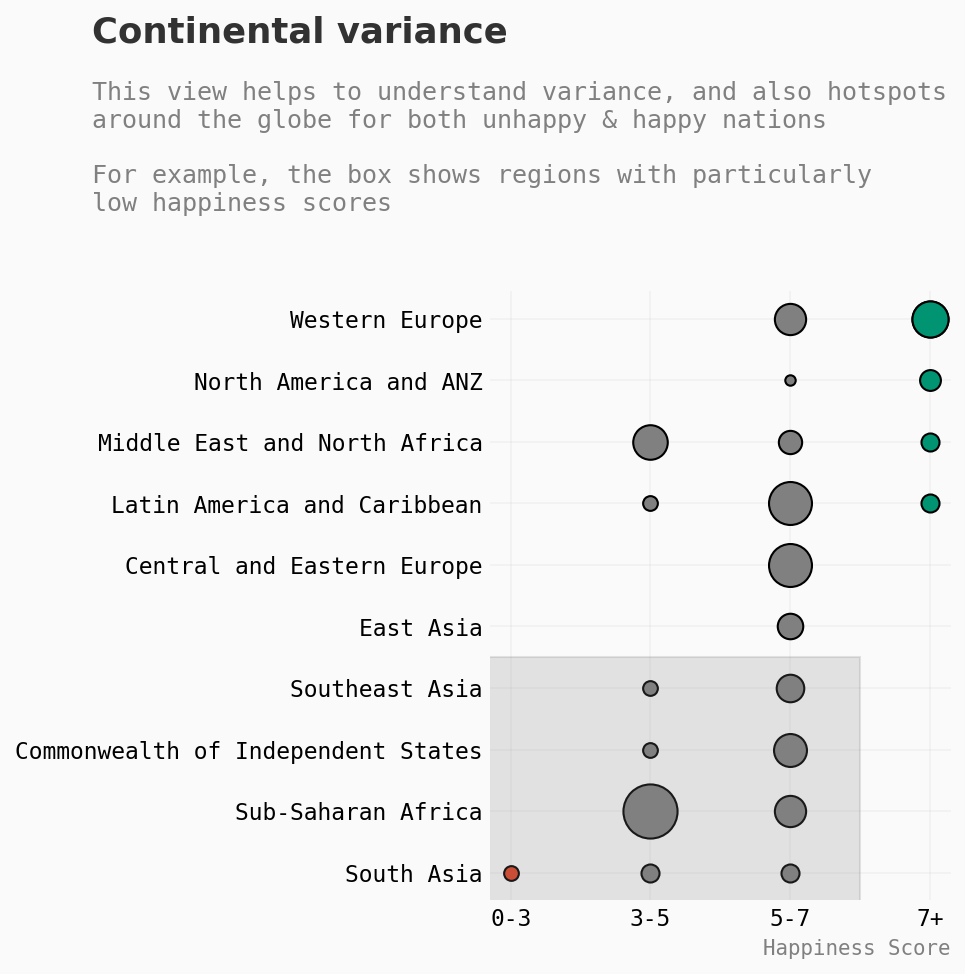

In [42]:
# matrix plot
plt.rcParams["font.family"] = "monospace"

fig = plt.figure(figsize=(5, 9), dpi=150)
gs = fig.add_gridspec(5, 5)
ax0 = fig.add_subplot(gs[1:4, 0:4]) 
background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

for item in cont_order[::-1]:
    for item_2 in bin_order:
        size = data_matrix[item][item_2]
        ax0.scatter(item_2, item, s=size*25, color='gray',ec='black',linewidth=1) 

# highlights
# ax0.scatter(1, 1, s=650, color='#dd4124',ec='black',linewidth=1,alpha=1)    
ax0.scatter(0, 0, s=50, color='#dd4124',ec='black',linewidth=1,alpha=1) 
# ax0.scatter(1, 7, s=300, color='#dd4124',ec='black',linewidth=1,alpha=1) 

ax0.scatter(3, 9, s=300, color='#009473',ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 8, s=100, color='#009473',ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 7, s=75, color='#009473',ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 6, s=75, color='#009473',ec='black',linewidth=1,alpha=1) 

ax0.grid(linewidth=0.1)        
ax0.set_xticklabels(bin_order, fontsize=11, rotation=0)
plt.yticks(fontsize=11)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
ax0.text(-3,13.5,'Continental variance',fontfamily='sans-serif',fontsize=17,weight='bold',color='#323232')
ax0.text(-3,10.3,
'''
This view helps to understand variance, and also hotspots
around the globe for both unhappy & happy nations

For example, the box shows regions with particularly
low happiness scores
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')    

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.set_axisbelow(True)
plt.xlabel('Happiness Score',loc='right',color='gray')

# rect
X, Y = -0.5, -0.5
ax0.add_patch(Rectangle((X, Y), 3, 4,alpha=0.2, edgecolor='gray',facecolor='gray'))

plt.show()

In [43]:
list_ = list(safety[safety['Regional indicator'] == 'Western Europe']['Country name'])
data  = df2[df2['Country'].isin(list_)]
data  = data[['Country', 'year',	'Life Ladder']]
data  = pd.pivot_table(data, values='Life Ladder', index=['Country'], columns=['year']).sort_values(by=2016,ascending=False)

display(data)

year             2005   2006   2007   2008   2009   2010   2011   2012   2013  \
Country                                                                         
Finland           NaN  7.672    NaN  7.671    NaN  7.393  7.354  7.420  7.445   
Norway            NaN  7.416    NaN  7.632    NaN    NaN    NaN  7.678    NaN   
Denmark         8.019    NaN  7.834  7.971  7.683  7.771  7.788  7.520  7.589   
Netherlands     7.464    NaN  7.452  7.631    NaN  7.502  7.564  7.471  7.407   
Iceland           NaN    NaN    NaN  6.888    NaN    NaN    NaN  7.591  7.501   
Switzerland       NaN  7.473    NaN    NaN  7.525    NaN    NaN  7.776    NaN   
Sweden          7.376    NaN  7.241  7.516  7.266  7.496  7.382  7.560  7.434   
Austria           NaN  7.122    NaN  7.181    NaN  7.303  7.471  7.401  7.499   
Ireland           NaN  7.144    NaN  7.568  7.046  7.257  7.007  6.965  6.760   
Luxembourg        NaN    NaN    NaN    NaN  6.958  7.097  7.101  6.964  7.131   
Belgium         7.262    NaN  7.219  7.117    NaN  6.854  7.111  6.935  7.104   
Germany         6.620    NaN  6.417  6.522  6.641  6.725  6.621  6.702  6.965   
United Kingdom  6.984    NaN  6.802  6.986  6.907  7.029  6.869  6.881  6.918   
Malta             NaN    NaN    NaN    NaN  6.328  5.774  6.155  5.963  6.380   
France          7.093  6.583    NaN  7.008  6.283  6.798  6.959  6.649  6.667   
Spain           7.153    NaN  6.995  7.294  6.199  6.188  6.518  6.291  6.150   
Italy           6.854    NaN  6.574  6.780  6.334  6.354  6.057  5.839  6.009   
North Cyprus      NaN    NaN    NaN    NaN    NaN    NaN    NaN  5.463  5.567   
Cyprus            NaN  6.238    NaN    NaN  6.833  6.387  6.690  6.181  5.439   
Portugal          NaN  5.405    NaN  5.717    NaN  5.095  5.220  4.994  5.158   
Greece          6.006    NaN  6.647    NaN  6.039  5.840  5.372  5.096  4.720   

year             2014   2015   2016   2017   2018   2019   2020  
Country                                                          
Finland         7.385  7.448  7.660  7.788  7.858  7.780  7.889  
Norway          7.444  7.603  7.596  7.579  7.444  7.442  7.290  
Denmark         7.508  7.514  7.558  7.594  7.649  7.693  7.515  
Netherlands     7.321  7.324  7.541  7.459  7.463  7.425  7.504  
Iceland           NaN  7.498  7.510  7.476    NaN  7.533  7.575  
Switzerland     7.493  7.572  7.459  7.474  7.509  7.694  7.508  
Sweden          7.239  7.289  7.369  7.287  7.375  7.398  7.314  
Austria         6.950  7.076  7.048  7.294  7.396  7.195  7.213  
Ireland         7.018  6.830  7.041  7.060  6.962  7.255  7.035  
Luxembourg      6.891  6.702  6.967  7.061  7.243  7.404    NaN  
Belgium         6.855  6.904  6.949  6.928  6.892  6.772  6.839  
Germany         6.984  7.037  6.874  7.074  7.118  7.035  7.312  
United Kingdom  6.758  6.515  6.824  7.103  7.233  7.157  6.798  
Malta           6.452  6.613  6.591  6.676  6.910  6.733  6.157  
France          6.467  6.358  6.475  6.635  6.666  6.690  6.714  
Spain           6.456  6.381  6.319  6.230  6.513  6.457  6.502  
Italy           6.027  5.848  5.955  6.199  6.517  6.445  6.488  
North Cyprus    5.786  5.843  5.827    NaN  5.608  5.467    NaN  
Cyprus          5.627  5.439  5.795  6.062  6.276  6.137  6.260  
Portugal        5.127  5.081  5.447  5.711  5.920  6.095  5.768  
Greece          4.756  5.623  5.303  5.148  5.409  5.952  5.788

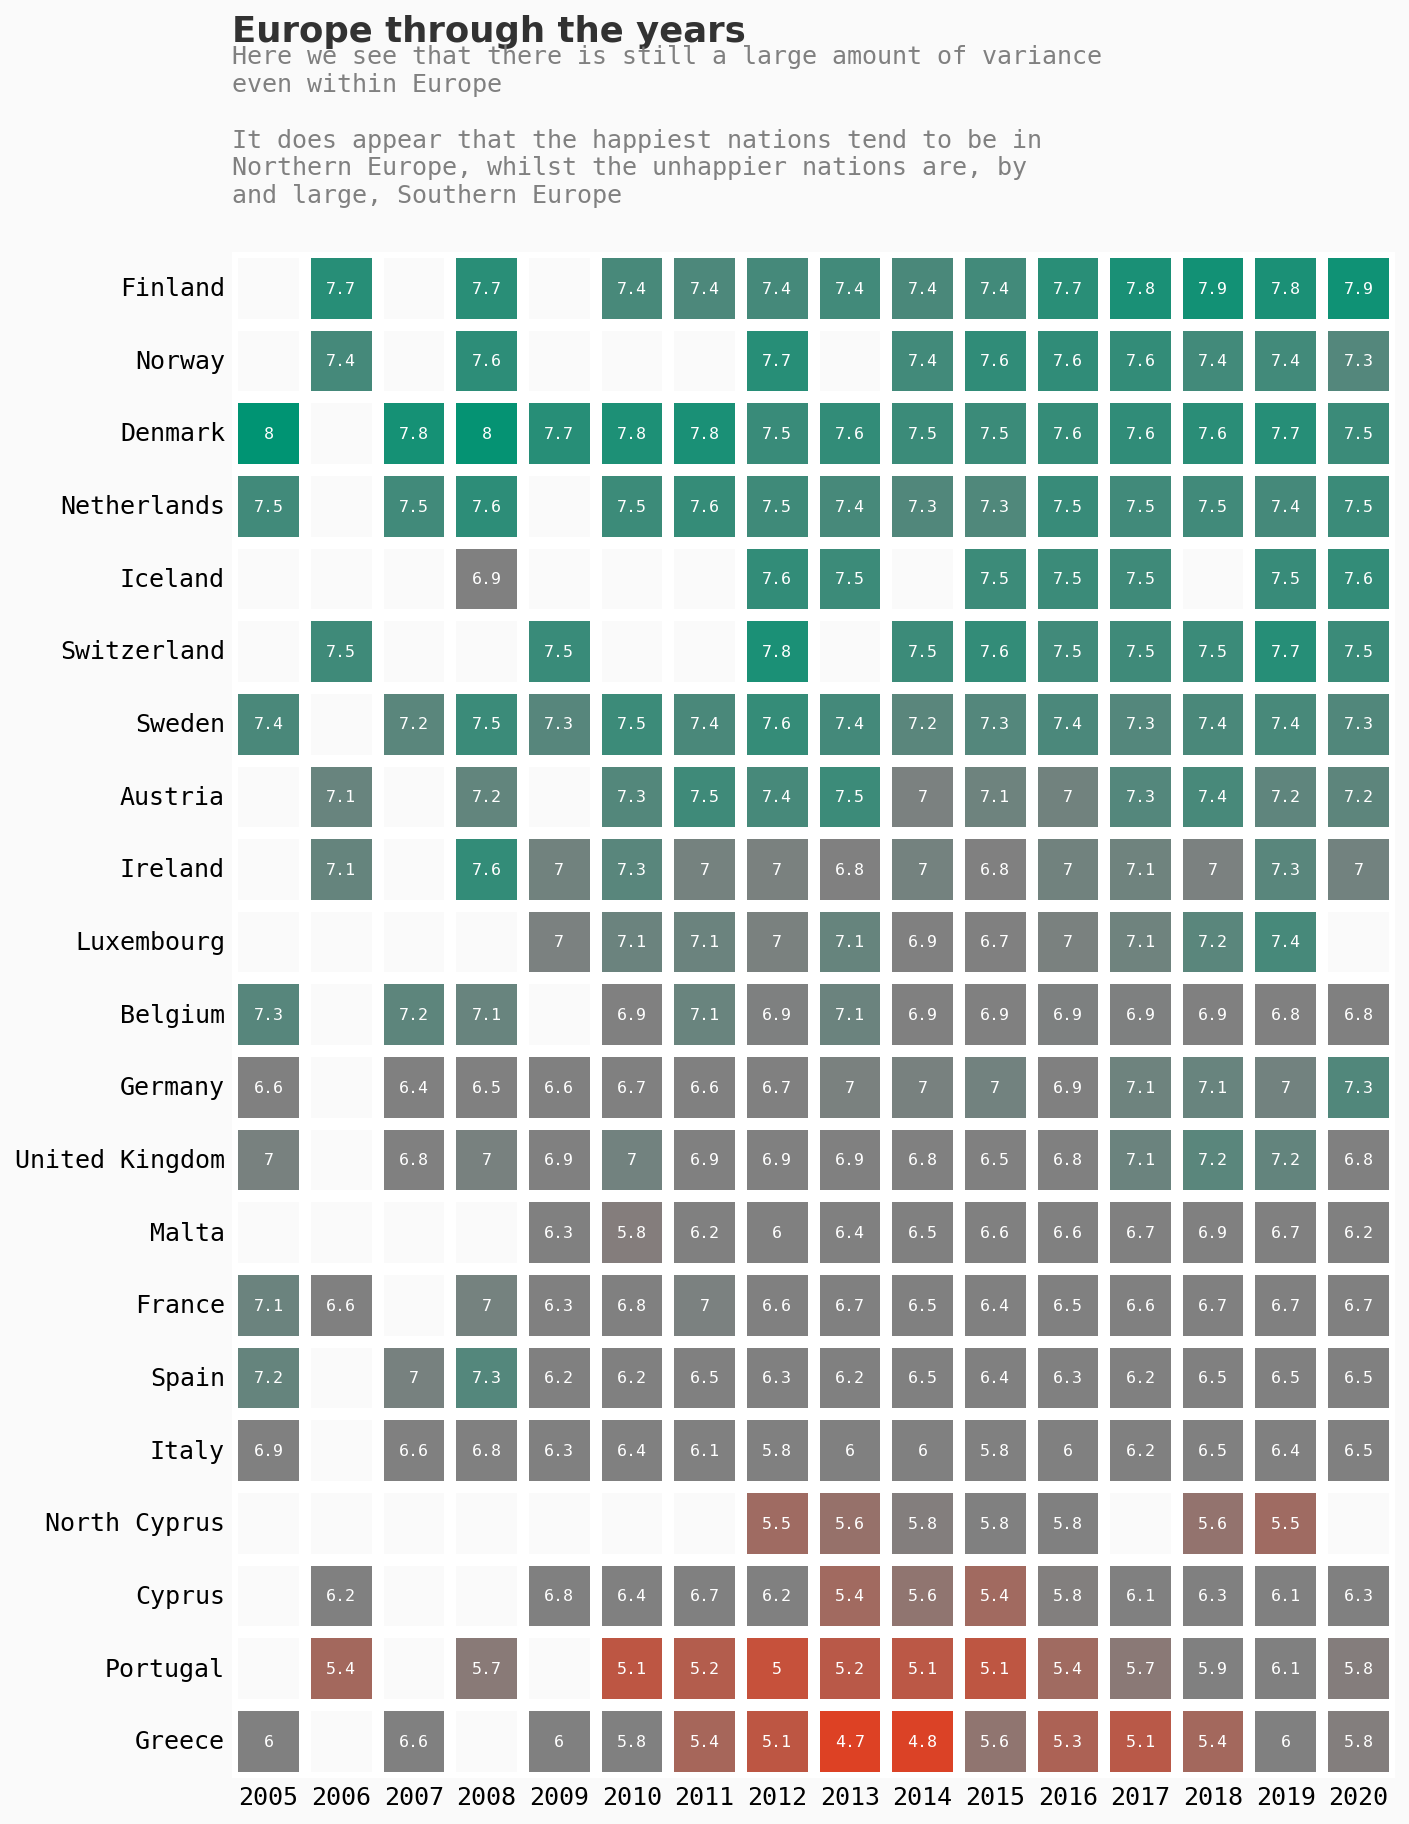

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"

colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(data, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,-2.9,'Europe through the years',fontfamily='sans-serif',fontsize=17,weight='bold',color='#323232')
ax.text(0,-0.3,
'''
Here we see that there is still a large amount of variance
even within Europe

It does appear that the happiest nations tend to be in
Northern Europe, whilst the unhappier nations are, by 
and large, Southern Europe
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

plt.show()

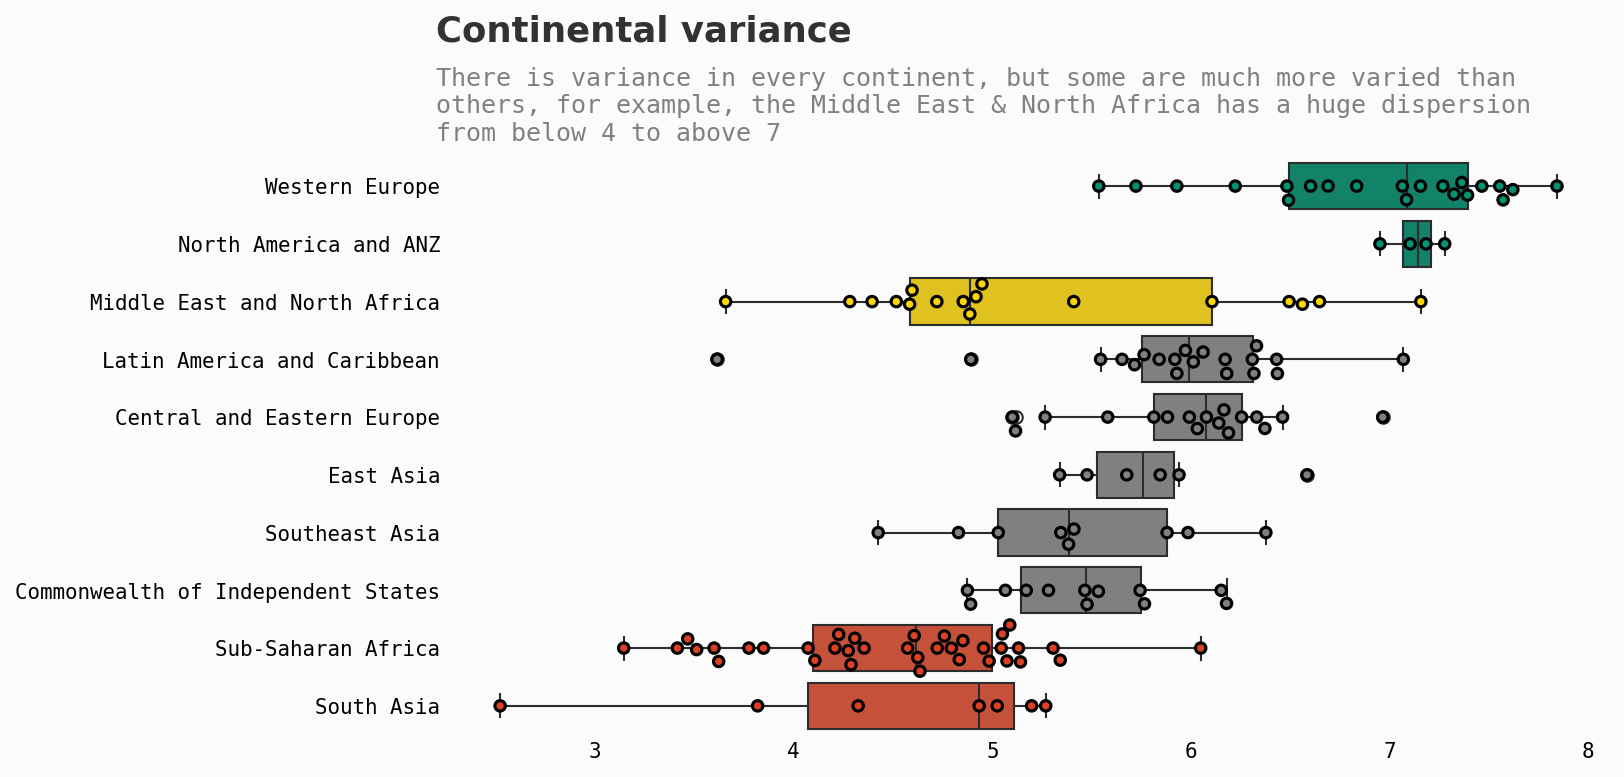

In [45]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

ax.set_facecolor(background)

pal = {'Western Europe':high_c, 
       'North America and ANZ':high_c,
       'Middle East and North Africa':'gold',
       'Latin America and Caribbean':'gray',
       'Central and Eastern Europe':'gray',
       'East Asia':'gray',
       'Southeast Asia':'gray',
       'Commonwealth of Independent States':'gray',
       'Sub-Saharan Africa':low_c,
       'South Asia':low_c}

ax = sns.boxplot(y='Regional indicator',   x='Ladder score', data=safety, palette=pal)

# Add jitter with the swarmplot function
ax = sns.swarmplot(y='Regional indicator', x='Ladder score', data=safety, edgecolor='black',linewidth=1.5,palette=pal)

for s in ['top','left','bottom','right']:
    ax.spines[s].set_visible(False)
    
ax.text(2.2,-2.5,'Continental variance',fontfamily='sans-serif',fontsize=17,weight='bold',color='#323232')
ax.text(2.2,-0.3,
'''
There is variance in every continent, but some are much more varied than 
others, for example, the Middle East & North Africa has a huge dispersion
from below 4 to above 7
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')
    
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [46]:
list_ = list(safety[safety['Regional indicator'] == 'Middle East and North Africa']['Country name'])
data  = df2[df2['Country'].isin(list_)]
data  = data[['Country', 'year',	'Life Ladder']]
data  = pd.pivot_table(data, values='Life Ladder', index=['Country'], columns=['year']).sort_values(by=2016,ascending=False)

display(data)

year                      2005   2006   2007   2008   2009   2010   2011  \
Country                                                                    
Israel                     NaN  7.173  6.841  7.261  7.353  7.359  7.433   
United Arab Emirates       NaN  6.734    NaN    NaN  6.866  7.097  7.119   
Saudi Arabia             7.080    NaN  7.267  6.811  6.148  6.307  6.700   
Bahrain                    NaN    NaN    NaN    NaN  5.701  5.937  4.824   
Kuwait                     NaN  6.076    NaN    NaN  6.585  6.798  6.378   
Libya                      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Morocco                    NaN    NaN    NaN    NaN    NaN  4.383  5.085   
Algeria                    NaN    NaN    NaN    NaN    NaN  5.464  5.317   
Turkey                   4.719    NaN  5.623  5.118  5.213  5.490  5.272   
Lebanon                  5.491  4.653    NaN  4.595  5.206  5.032  5.188   
Jordan                   6.295    NaN  5.598  4.930  6.000  5.570  5.539   
Palestinian Territories    NaN  4.716  4.151  4.386  4.470  4.703  4.751   
Iran                     5.308    NaN  5.336  5.129    NaN    NaN  4.768   
Egypt                    5.168    NaN  5.541  4.632  5.066  4.669  4.174   
Tunisia                    NaN    NaN    NaN    NaN  5.025  5.131  4.876   
Iraq                       NaN    NaN    NaN  4.590  4.775  5.065  4.725   
Yemen                      NaN    NaN  4.477    NaN  4.809  4.350  3.746   

year                      2012   2013   2014   2015   2016   2017   2018  \
Country                                                                    
Israel                   7.111  7.321  7.401  7.079  7.159  7.331  6.927   
United Arab Emirates     7.218  6.621  6.540  6.568  6.831  7.039  6.604   
Saudi Arabia             6.396  6.495  6.278  6.345  6.474  6.294  6.356   
Bahrain                  5.027  6.690  6.165  6.007  6.170  6.227    NaN   
Kuwait                   6.221  6.480  6.180  6.146  5.947  6.094    NaN   
Libya                    5.754    NaN    NaN  5.615  5.434  5.647  5.494   
Morocco                  4.970  5.142    NaN  5.163  5.386  5.312  4.897   
Algeria                  5.605    NaN  6.355    NaN  5.341  5.249  5.043   
Turkey                   5.309  4.888  5.580  5.514  5.326  5.607  5.186   
Lebanon                  4.573  4.983  5.233  5.172  5.271  5.154  5.167   
Jordan                   5.132  5.172  5.333  5.405  5.271  4.808  4.639   
Palestinian Territories  4.647  4.844  4.722  4.695  4.907  4.628  4.554   
Iran                     4.609  5.140  4.682  4.750  4.653  4.717  4.278   
Egypt                    4.204  3.559  4.885  4.763  4.557  3.929  4.005   
Tunisia                  4.464  5.246  4.764  5.132  4.521  4.124  4.741   
Iraq                     4.660  4.725  4.542  4.493  4.413  4.462  4.886   
Yemen                    4.061  4.218  3.968  2.983  3.826  3.254  3.058   

year                      2019   2020  
Country                                
Israel                   7.332  7.195  
United Arab Emirates     6.711  6.458  
Saudi Arabia             6.561  6.560  
Bahrain                  7.098  6.173  
Kuwait                   6.106    NaN  
Libya                    5.330    NaN  
Morocco                  5.057  4.803  
Algeria                  4.745    NaN  
Turkey                   4.872  4.862  
Lebanon                  4.024    NaN  
Jordan                   4.453  4.094  
Palestinian Territories  4.483    NaN  
Iran                     5.006  4.865  
Egypt                    4.328  4.472  
Tunisia                  4.315  4.731  
Iraq                       NaN  4.785  
Yemen                    4.197    NaN

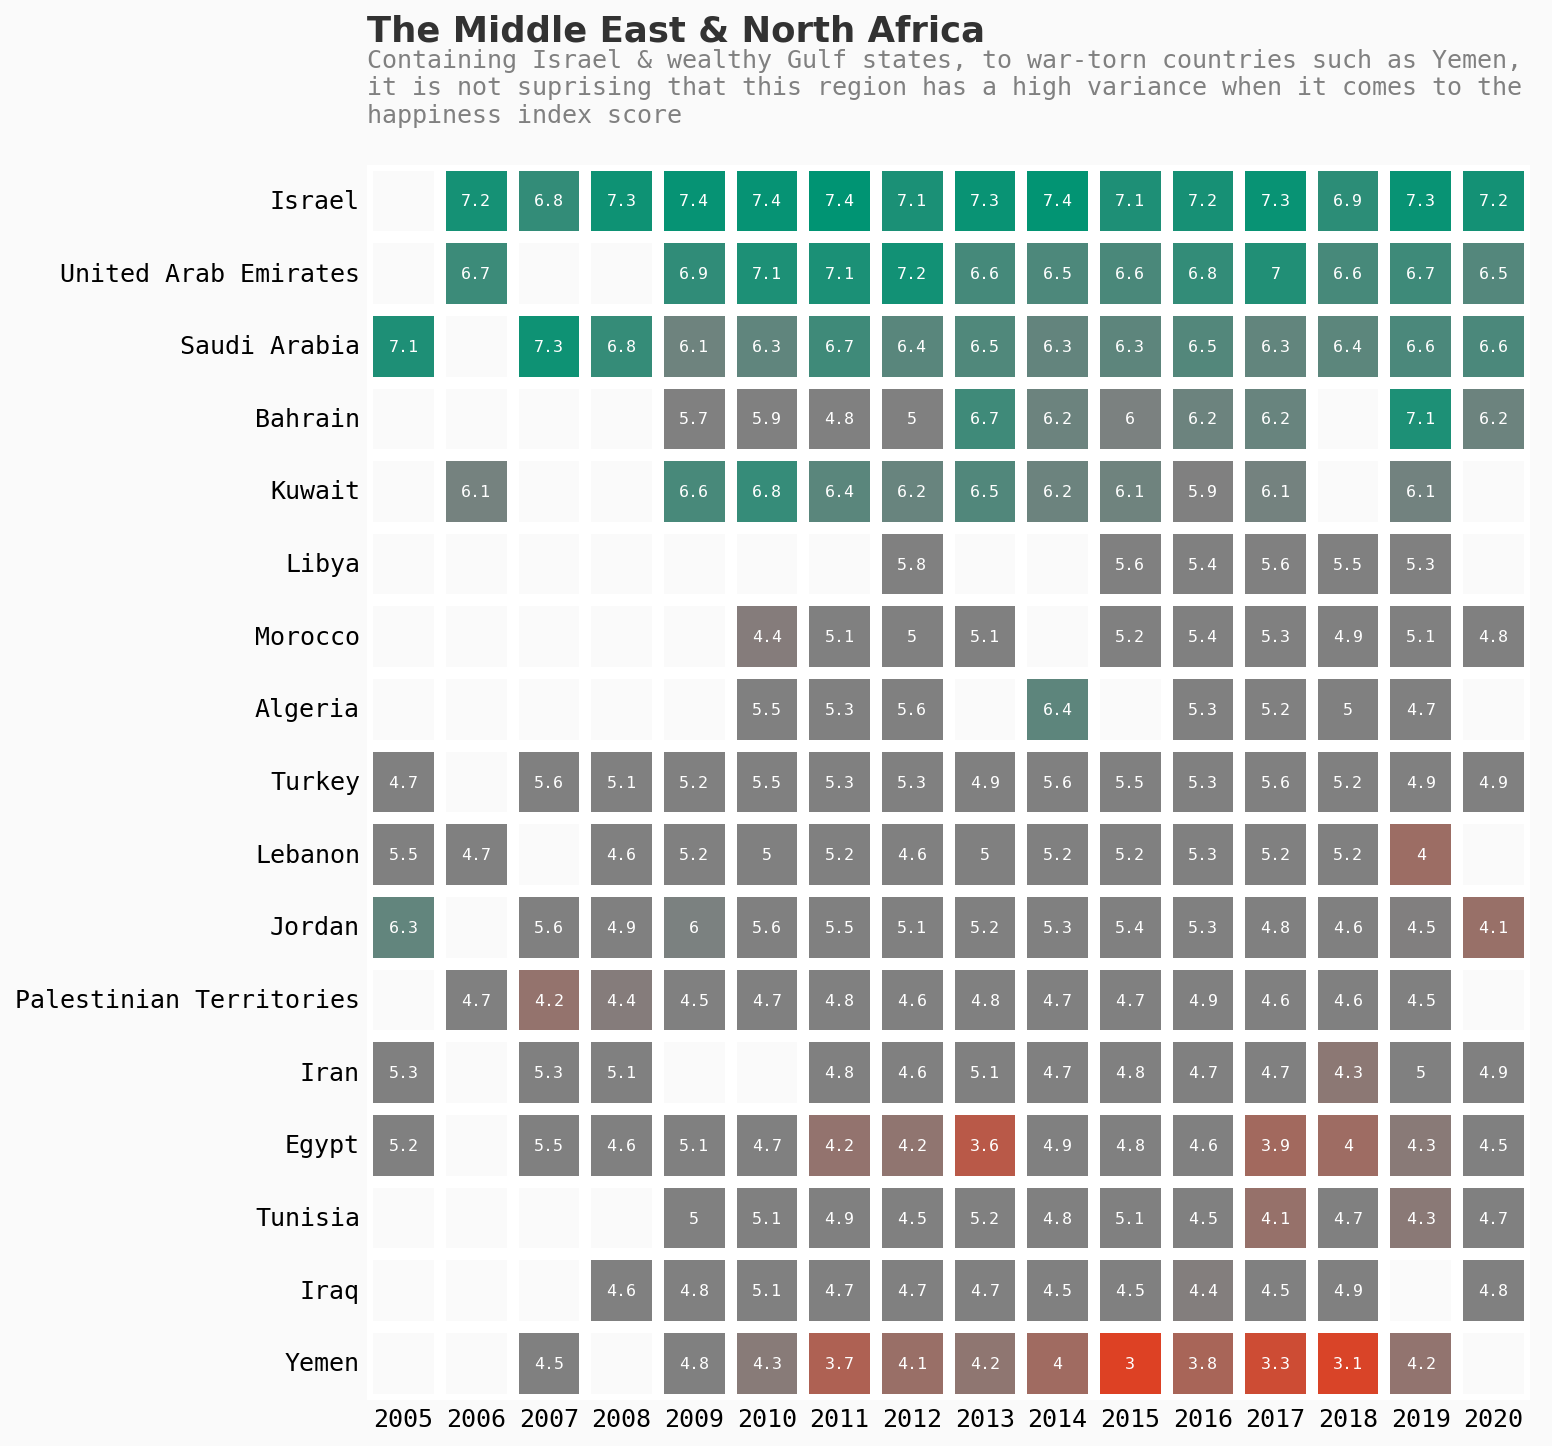

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"

colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(data, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})

ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,-1.7,'The Middle East & North Africa',fontfamily='sans-serif',fontsize=17,weight='bold',color='#323232')
ax.text(0,-0.2,
'''
Containing Israel & wealthy Gulf states, to war-torn countries such as Yemen, 
it is not suprising that this region has a high variance when it comes to the
happiness index score
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

plt.show()

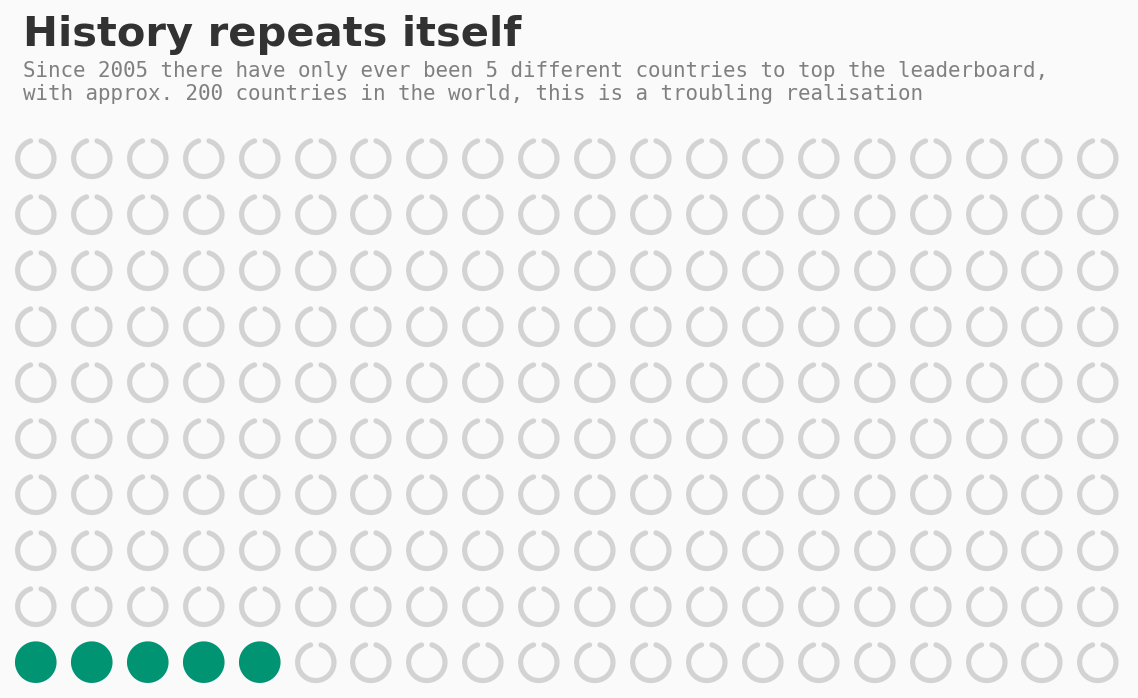

In [48]:
from pywaffle import Waffle
fig = plt.figure(figsize=(12, 4),dpi=150,facecolor=background_color,
                 FigureClass=Waffle,
                 rows=10,
                 values=[5, 195],
                 colors=[high_c, "lightgray"],
                 icons=['circle','circle-notch'],
                 font_size=20,vertical=True,
                 )

fig.text(0.017,1.1,'History repeats itself',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
fig.text(0.017,1.01,'Since 2005 there have only ever been 5 different countries to top the leaderboard,\nwith approx. 200 countries in the world, this is a troubling realisation',fontfamily='monospace',color='gray',fontsize=10)
plt.show()

# Clustering Overview

In [50]:
refined_merge = merge_safety[['Country','Ladder score',
                              'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                              'Freedom to make life choices', 'Generosity',
                              'Perceptions of corruption', 'Population (2020)', 'Density (P/Km²)', 'Land Area (Km²)',
                              'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %']]

X = refined_merge[['Ladder score','Logged GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption', 'Fert. Rate', 'Med. Age',
                   'Urban Pop %']]

# display(refined_merge)
display(X)

Ladder score  Logged GDP per capita  Social support  \
0           7.842                 10.775           0.954   
1           7.620                 10.933           0.954   
2           7.571                 11.117           0.942   
3           7.554                 10.878           0.983   
4           7.464                 10.932           0.942   
..            ...                    ...             ...   
135         3.512                  7.926           0.787   
136         3.467                  9.782           0.784   
137         3.415                  7.676           0.552   
138         3.145                  7.943           0.750   
139         2.523                  7.695           0.463   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.000                         0.949      -0.098   
1                     72.700                         0.946       0.030   
2                     74.400                         0.919       0.025   
3                     73.000                         0.955       0.160   
4                     72.400                         0.913       0.175   
..                       ...                           ...         ...   
135                   48.700                         0.715      -0.131   
136                   59.269                         0.824      -0.246   
137                   61.400                         0.897       0.061   
138                   56.201                         0.677      -0.047   
139                   52.493                         0.382      -0.102   

     Perceptions of corruption  Fert. Rate  Med. Age  Urban Pop %  
0                        0.186         1.5      43.0         0.86  
1                        0.179         1.8      42.0         0.88  
2                        0.292         1.5      43.0         0.74  
3                        0.673         1.8      37.0         0.94  
4                        0.338         1.7      43.0         0.92  
..                         ...         ...       ...          ...  
135                      0.915         3.2      24.0         0.31  
136                      0.801         2.9      24.0         0.73  
137                      0.167         4.1      20.0         0.18  
138                      0.821         3.6      19.0         0.38  
139                      0.924         4.6      18.0         0.25  

[137 rows x 10 columns]

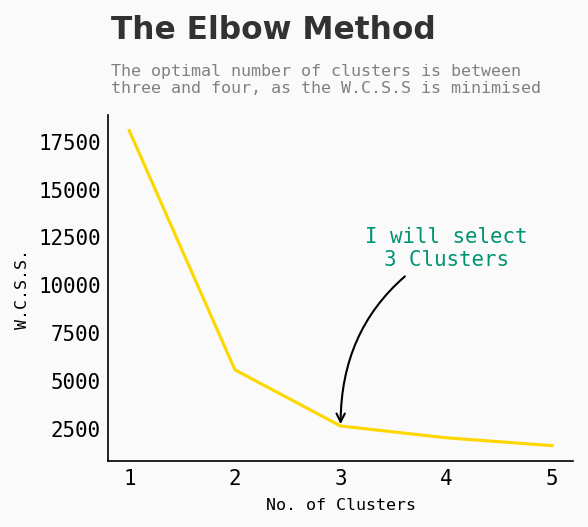

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wcss = []
for i in range(1, 6):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 20, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
###
fig = plt.figure(figsize=(4,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
fig.text(0.13,0.93,
'''
The optimal number of clusters is between 
three and four, as the W.C.S.S is minimised''',fontsize=8, color='gray',ha='left')

fig.text(0.13,1.05,'The Elbow Method',fontfamily='sans-serif',fontweight='bold',fontsize=15,color='#323232')

plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.tick_params(axis=u'both', which=u'both',length=0)

plt.annotate('I will select\n3 Clusters', xy=(3, 2500), xytext=(4, 11000),
             arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color=high_c)

plt.plot(range(1, 6), wcss,color='gold')
plt.xlabel('No. of Clusters',fontsize=8)
plt.ylabel('W.C.S.S.',fontsize=8)
plt.show()

In [52]:
# Create clusters
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
refined_merge['Cluster'] = X["Cluster"].astype("category")

# display(X)
display(refined_merge)

refined_merge.groupby('Cluster')['Ladder score'].mean()

Country  Ladder score  Logged GDP per capita  Social support  \
0        Finland         7.842                 10.775           0.954   
1        Denmark         7.620                 10.933           0.954   
2    Switzerland         7.571                 11.117           0.942   
3        Iceland         7.554                 10.878           0.983   
4    Netherlands         7.464                 10.932           0.942   
..           ...           ...                    ...             ...   
135      Lesotho         3.512                  7.926           0.787   
136     Botswana         3.467                  9.782           0.784   
137       Rwanda         3.415                  7.676           0.552   
138     Zimbabwe         3.145                  7.943           0.750   
139  Afghanistan         2.523                  7.695           0.463   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     72.000                         0.949      -0.098   
1                     72.700                         0.946       0.030   
2                     74.400                         0.919       0.025   
3                     73.000                         0.955       0.160   
4                     72.400                         0.913       0.175   
..                       ...                           ...         ...   
135                   48.700                         0.715      -0.131   
136                   59.269                         0.824      -0.246   
137                   61.400                         0.897       0.061   
138                   56.201                         0.677      -0.047   
139                   52.493                         0.382      -0.102   

     Perceptions of corruption  Population (2020)  Density (P/Km²)  \
0                        0.186            5542237               18   
1                        0.179            5795780              137   
2                        0.292            8665615              219   
3                        0.673             341628                3   
4                        0.338           17141544              508   
..                         ...                ...              ...   
135                      0.915            2145194               71   
136                      0.801            2359585                4   
137                      0.167           13005303              525   
138                      0.821           14899771               38   
139                      0.924           39074280               60   

     Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  \
0             303890         14000.0         1.5      43.0         0.86   
1              42430         15200.0         1.8      42.0         0.88   
2              39516         52000.0         1.5      43.0         0.74   
3             100250           380.0         1.8      37.0         0.94   
4              33720         16000.0         1.7      43.0         0.92   
..               ...             ...         ...       ...          ...   
135            30360        -10047.0         3.2      24.0         0.31   
136           566730          3000.0         2.9      24.0         0.73   
137            24670         -9000.0         4.1      20.0         0.18   
138           386850       -116858.0         3.6      19.0         0.38   
139           652860        -62920.0         4.6      18.0         0.25   

    Cluster  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
135       2  
136       2  
137       2  
138       2  
139       2  

[137 rows x 16 columns]

Cluster
0    5.547958
1    6.370569
2    4.352895
Name: Ladder score, dtype: float64

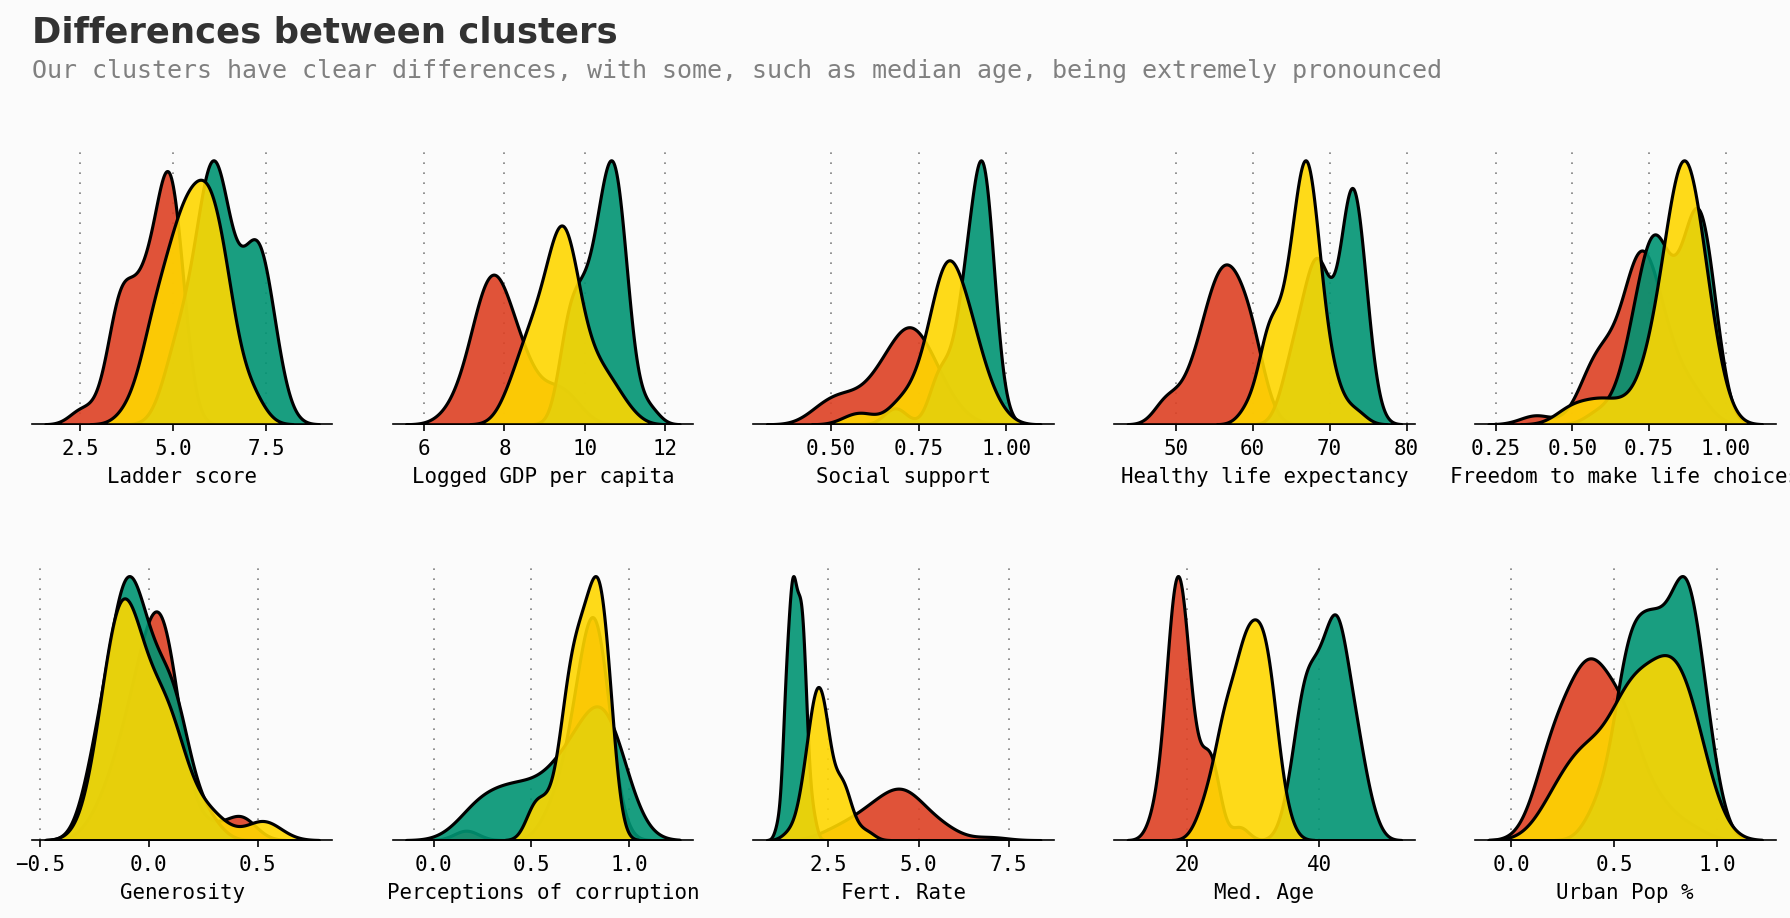

In [53]:
background_color = '#fbfbfb'
fig = plt.figure(figsize=(15, 6), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 5)
gs.update(wspace=0.2, hspace=0.5)

plot = 0
for row in range(0, 2):
    for col in range(0, 5):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

clus_vars = ['Ladder score', 'Logged GDP per capita', 'Social support',
             'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
             'Perceptions of corruption', 'Fert. Rate', 'Med. Age',
             'Urban Pop %',]

cluster_cols = ['gold', high_c, low_c]

plot = 0  
for variable in clus_vars:
        data = pd.pivot_table(refined_merge, values=variable, index='Country', columns=['Cluster']).reset_index().drop(['Country'], axis=1)
        sns.kdeplot(data, ax=locals()["ax"+str(plot)], 
                    palette=cluster_cols,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.38), 'Differences between clusters', fontsize=17, fontweight='bold', fontfamily='sans-serif',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.25), 'Our clusters have clear differences, with some, such as median age, being extremely pronounced', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.show()

In [54]:
#data prep
geo_temp = refined_merge

#source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# create a column for code 
geo_temp['CODE']=alpha3code(geo_temp['Country'])
geo_temp        =geo_temp[['Country','Cluster','CODE']]

# load the shapefile 
path          = "../Python/Input/ne_110m_admin_0_sovereignty/"
world         = geopandas.read_file(path+'ne_110m_admin_0_sovereignty.shp')
world         = world[['SOVEREIGNT', 'SOV_A3', 'geometry']]
world         = world.rename(columns={'SOV_A3': 'CODE'})
# world['CODE'] = alpha3code(world['SOVEREIGNT'])

# shapefile file contained wrongly assigned CODE, manual fix needed
# print(world[world['CODE'].str.contains("1")])
#                    WORLD      CODE  GEO_TEMP_CODE 
# 4    United States of America  US1  USA
# 5                  Kazakhstan  KA1  KAZ
# 20             United Kingdom  GB1  GBR
# 22                    Denmark  DN1  DNK
# 23                     France  FR1  FRA
# 45                       Cuba  CU1    
# 74                     Israel  IS1  ISR 
# 127               Netherlands  NL1  NLD 
# 132               New Zealand  NZ1  NZL  
# 133                 Australia  AU1  AUS 
# 135                     China  CH1  CHN 
# 145                   Finland  FI1  FIN

# Fix wrongly assigned CODE
country_code = {'United States of America':'USA',
                'Kazakhstan':'KAZ',
                'United Kingdom':'GBR',
                'Denmark':'DNK',
                'France':'FRA',
                'Israel':'ISR',
                'Netherlands':'NLD',
                'New Zealand':'NZL',
                'Australia':'AUS',
                'China':'CHN',
                'Finland':'FIN'}

for country_, code_ in country_code.items():
    world.loc[world.SOVEREIGNT==country_, 'CODE'] = code_

# merge datasets
merge=pd.merge(world,geo_temp,on='CODE')

# print('Geo Temp')
# display(geo_temp)
# print()
# print('world')
# display(world)
# print()
print('Merged')
display(merge)

Merged


SOVEREIGNT CODE  \
0                      Canada  CAN   
1    United States of America  USA   
2                  Kazakhstan  KAZ   
3                  Uzbekistan  UZB   
4                   Indonesia  IDN   
..                        ...  ...   
118                    Rwanda  RWA   
119    Bosnia and Herzegovina  BIH   
120           North Macedonia  MKD   
121        Republic of Serbia  SRB   
122                Montenegro  MNE   

                                              geometry  \
0    MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...   
1    MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...   
2    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   
3    POLYGON ((55.96819 41.30864, 55.92892 44.99586...   
4    MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...   
..                                                 ...   
118  POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,...   
119  POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2...   
120  POLYGON ((22.38053 42.32026, 22.88137 41.9993,...   
121  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
122  POLYGON ((20.0707 42.58863, 19.80161 42.50009,...   

                    Country Cluster  
0                    Canada       1  
1             United States       1  
2                Kazakhstan       0  
3                Uzbekistan       0  
4                 Indonesia       0  
..                      ...     ...  
118                  Rwanda       2  
119  Bosnia and Herzegovina       1  
120         North Macedonia       1  
121                  Serbia       1  
122              Montenegro       1  

[123 rows x 5 columns]

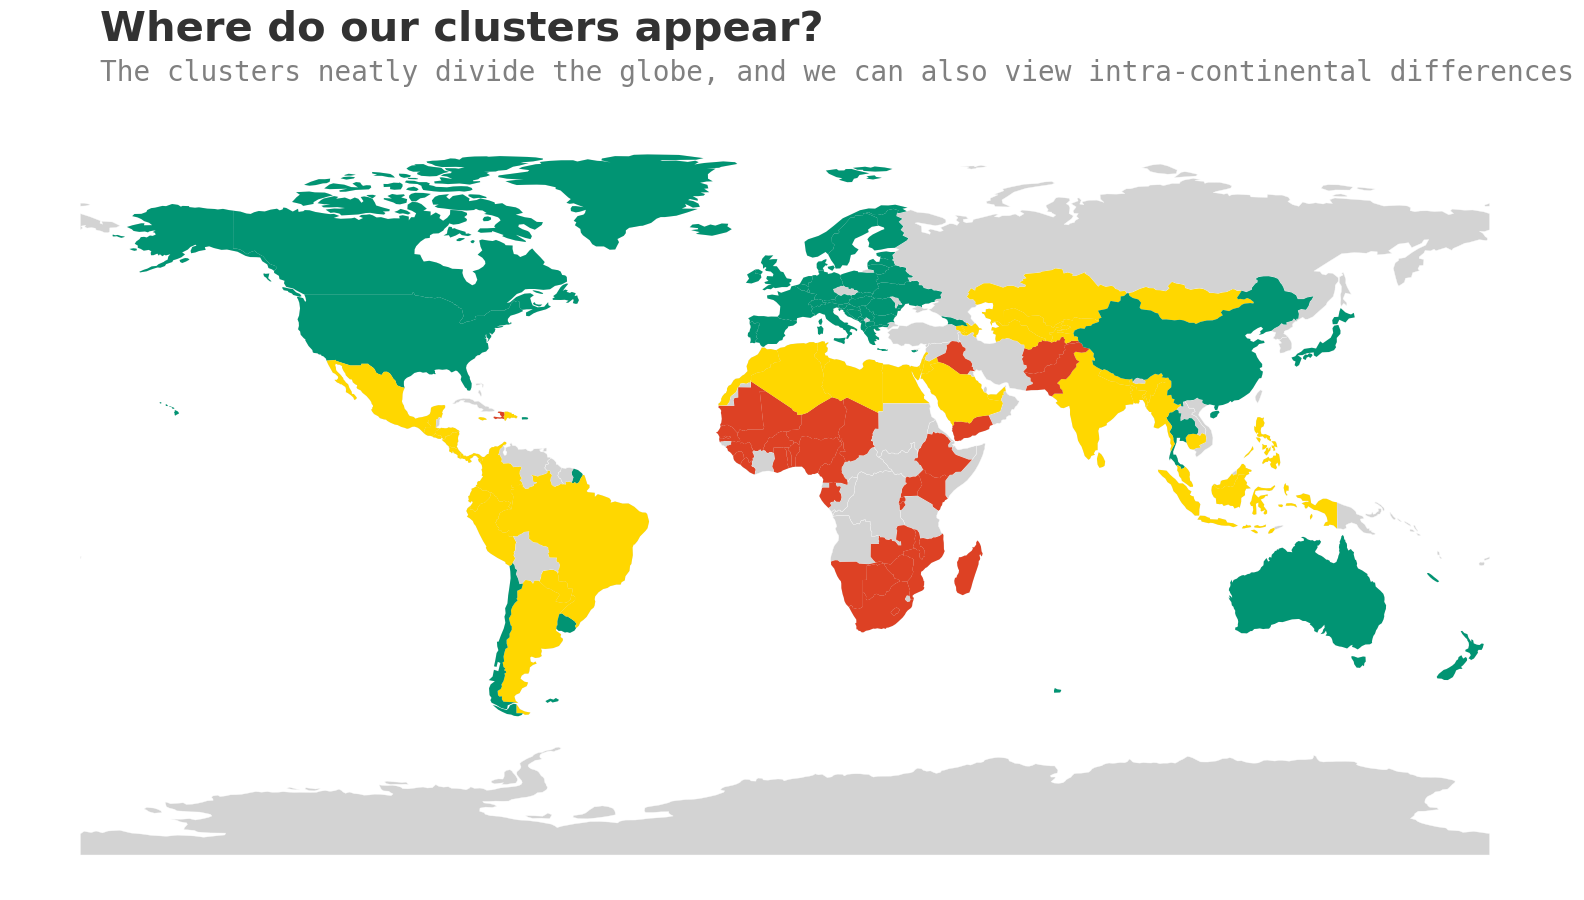

In [55]:
# Custom colour map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['gold', high_c, low_c])

ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='Cluster',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)

ax.text(-175,112,'Where do our clusters appear?',fontsize=30,fontweight='bold',fontfamily='sans-serif',color='#323232')
ax.text(-175,102,'The clusters neatly divide the globe, and we can also view intra-continental differences',color='gray',fontfamily='monospace',fontsize=20)

plt.show()